# Quiz 02 - Marilyn Gartley, Fawad Kirmani, Vedant Khandelwal

## Ques 02

### Part 01 - Data Exploration

In [253]:
import pandas as pd
df = pd.read_csv('data/water-treatment.csv') # Reading the dataset

In [254]:
df.head()

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [255]:
# Converting all numeric values to float data type.
for col in list(df.columns):
    temp = df[col].values.tolist()
    temp_val = list()
    for i in temp:
        try:
            temp_val.append(float(i))
        except:
            temp_val.append(i)
    df[col] = temp_val

In [256]:
df.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [257]:
# Print the count of all the non-null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    float64
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    float64
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    float64
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

In [258]:
# Removing all the rows with null values in the column PH-S and PH-E
updated_df = df[df['PH-S']!="?"]
updated_df = updated_df[updated_df['PH-E']!="?"]
# Perfoming the above, removed one single row from the data frame.

In [260]:
updated_df.columns

Index(['date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')

In [261]:
# Output_df: Contains values of all the water output features.
# Input_df: Contains values of all the water input features. 
output_df  = updated_df[[col for col in list(updated_df.columns) if col.count("-S")==1]]
input_df = updated_df[[col for col in list(updated_df.columns) if col.count("-E")==1]]

In [262]:
# Printing the shape and columns of all the input and output features
print(output_df.shape, input_df.shape)
print(output_df.columns)
print(input_df.columns)

(526, 13) (526, 9)
Index(['PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-SS-G', 'RD-SED-G'],
      dtype='object')
Index(['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E'],
      dtype='object')


In [265]:
# Removing all the irrelevant columns from input and output data frame. 
output_df = output_df.drop(['RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-SS-G', 'RD-SED-G'], axis =1 )

In [266]:
# Prining the shape of the final input and output data frame
print(output_df.shape, input_df.shape)
print(output_df.columns)
print(input_df.columns)

(526, 7) (526, 9)
Index(['PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S'], dtype='object')
Index(['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E'],
      dtype='object')


In [267]:
input_df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E
0,44101.0,1.5,7.8,?,407.0,166.0,66.3,4.5,2110.0
1,39024.0,3.0,7.7,?,443.0,214.0,69.2,6.5,2660.0
2,32229.0,5.0,7.6,?,528.0,186.0,69.9,3.4,1666.0
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0


In [268]:
output_df.head()

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,7.3,?,84.0,21.0,81.0,0.02,2000.0
1,7.5,?,91.0,17.0,94.1,0.0,2590.0
2,7.6,?,128.0,21.0,81.0,0.05,1888.0
3,7.6,20.0,104.0,20.0,96.7,0.0,1840.0
4,7.6,19.0,108.0,22.0,65.9,0.02,2120.0


In [269]:
# Calculating correlation values of all the possible pairs of features in output and input data frame. 
# The nan values are not handled. The nan values are ignored while calculating the correlation values. 
# The calculation correlation coeffecient is appended to a list variable
from scipy.stats import pearsonr
corr_val = list()
for col_o in list(output_df.columns):
    top = list()
    for col_i in list(input_df.columns):
        temp_o = list()
        temp_i = list()
        for i,j in zip(output_df[col_o].values.tolist(),input_df[col_i].values.tolist()):
            if(i!="?" and j!="?"):
                temp_o.append(i)
                temp_i.append(j)
            else:
                continue
        corr, _ = pearsonr(temp_o, temp_i)
        top.append(corr)
    corr_val.append(top)

In [270]:
# Creating a dataframe from correlation values obtained in previous cell. Rows- Input Feature, Columns - Output Features
df_corr = pd.DataFrame({key:val for key,val in zip(list(output_df.columns), corr_val)}, index =list(input_df.columns))

In [271]:
df_corr

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
Q-E,0.040173,0.000929,-0.070980,-0.021058,-0.121982,-0.001616,-0.071337
ZN-E,-0.095350,-0.014821,0.010347,-0.060812,0.089587,-0.044221,0.072687
PH-E,0.331429,-0.032147,-0.048153,-0.086393,0.099078,-0.030085,0.235978
DBO-E,0.002295,0.140591,0.218737,0.108298,0.024955,0.056113,0.216583
DQO-E,-0.020506,0.108290,0.315592,0.079789,0.073972,0.023570,0.280208
SS-E,0.041792,0.015179,0.033861,0.006588,-0.120907,0.017621,0.077973
SSV-E,-0.085539,0.012188,0.110609,-0.001082,0.360871,-0.018293,0.161908
SED-E,-0.006132,0.034993,0.064193,-0.004933,0.029754,0.012177,0.160165
COND-E,0.063735,0.016360,0.160575,0.036509,-0.002221,-0.037451,0.906568


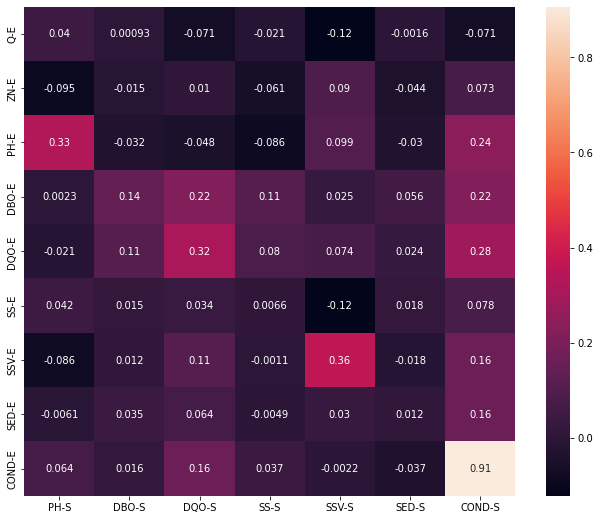

In [272]:
# Visualizing the values with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(df_corr, annot=True)
# COND-S, COND-E showing high correlation. 

### Part 02 - Data Preparation

In [274]:
# Considering a range of 6.5-7.7 pH value as safe. 
# Appending value 1 for the safe pH value and 0 for the unsafe pH value.
target_val = list()
for ph in updated_df['PH-E'].values.tolist():
    if(ph>=6.5 and ph<=7.7):
        target_val.append(1)
    else:
        target_val.append(0)

In [275]:
len(target_val), sum(target_val)

(526, 222)

In [276]:
# Adding column of SAFE-PH-E values to the data frame
updated_df['SAFE-PH-E'] = target_val

In [277]:
# Considering a range of 6.5-7.7 pH value as safe. 
# Appending value 1 for the safe pH value and 0 for the unsafe pH value.
target_val = list()
for ph in updated_df['PH-S'].values.tolist():
    ph = float(ph)
    if(ph>=6.5 and ph<=7.7):
        target_val.append(1)
    else:
        target_val.append(0)
len(target_val), sum(target_val)

(526, 310)

In [278]:
# Adding column of SAFE-PH-S values to the data frame
updated_df['SAFE-PH-S'] = target_val

### Part 03 - Train

In [279]:
updated_df.columns

Index(['date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G', 'SAFE-PH-E', 'SAFE-PH-S'],
      dtype='object')

In [280]:
updated_df.head()

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,SAFE-PH-E,SAFE-PH-S
0,D-1/3/90,44101.0,1.5,7.8,?,407.0,166.0,66.3,4.5,2110.0,...,58.8,95.5,?,70.0,?,79.4,87.3,99.6,0,1
1,D-2/3/90,39024.0,3.0,7.7,?,443.0,214.0,69.2,6.5,2660.0,...,60.7,94.8,?,80.8,?,79.5,92.1,100.0,1,1
2,D-4/3/90,32229.0,5.0,7.6,?,528.0,186.0,69.9,3.4,1666.0,...,58.2,95.6,?,52.9,?,75.8,88.7,98.5,1,1
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,...,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0,0,1
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,...,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5,0,1


In [281]:
# Replacing all the questions marks with np.nan values.
import numpy as np
for col in list(updated_df.columns):
    temp = updated_df[col].values.tolist()
    temp_val = list()
    for val in temp:
        if val=='?':
            temp_val.append(np.nan)
        else:
            temp_val.append(val)
    updated_df[col] = temp_val

Caution: The nan values in the dataset is handled with mean values of the column, which might introduce errors to the analysis.[1]

Hence we have added another experiment by removing all the nan values column.

[1] Ellis, J., Srivastava, B., Bellamy, R., & Aaron, A. (2018, April). Water advisor-a data-driven, multi-modal, contextual assistant to help with water usage decisions. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 32, No. 1).

In [284]:
# Handling nan values for all the numeric columns. 
# Replacing nan values with the mean values of the column.
updated_df_nan = updated_df.copy()
for col in list(updated_df.columns):
    try:
        mean = updated_df[col].mean()
        updated_df[col] = updated_df[col].fillna(mean)
    except TypeError:
        continue

In [285]:
updated_df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,SAFE-PH-E,SAFE-PH-S
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,37246.267717,2.360707,7.809125,188.489066,406.592308,227.474286,61.376893,4.591617,1477.115970,7.829087,...,58.567050,90.589379,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290,0.422053,0.589354
std,6513.018479,2.744010,0.245478,60.546616,119.586634,135.938914,12.290969,2.680059,393.759187,0.226211,...,12.718289,8.686688,8.470931,11.337629,6.789356,8.683380,8.166618,4.327944,0.494357,0.492419
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000,0.000000,0.000000
25%,32980.500000,0.900000,7.600000,148.000000,326.250000,170.000000,55.825000,3.200000,1200.500000,7.700000,...,50.625000,88.950000,81.800000,63.400000,87.800000,74.225000,87.700000,99.200000,0.000000,0.000000
50%,36248.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.000000,4.500000,1405.500000,7.800000,...,59.300000,93.300000,85.000000,69.300000,89.900000,78.700000,90.700000,99.700000,0.000000,1.000000
75%,41104.500000,3.000000,8.000000,222.000000,473.000000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,66.850000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000,1.000000,1.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000,1.000000,1.000000


In [286]:
# Loading all the necessary libraries. 
# Code referred from Analytics Vidhya, Sklearn.
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import graphviz # To install: pip install graphviz and For Mac Users: brew instal graphviz.

# This function takes in the model and training data. 

def tencrossval(model,x_train, y_train):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) # It performs ten-cross validation.
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) # It further prints the mean accuracy value and the standard deviation of the accuracy value. 

    return 0

# This function takes in the X (all features) and y (target value) as input. 
def logreg(X,y):
    print("_____Classification 01 - Logistic Regression_______")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # It divides the data into test and train set, scale the data and further performs training for LOGISTIC REGRESSION.
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred)) # It also prints a classification report for the trained model. 
    print("_____Performing 10 Cross Fold Validation______")
    tencrossval(pipe, X_train, y_train) # Further it calls the tencrossval function to perform ten cross fold validation.
    print("_______Finished Logestic Regression______ \n")

    return ""

# This function takes in the X (all features) and y (target value) as input and returns the classifier model.
def dt(X,y):
    print("_____Classification 02 - Decision Tree_______")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # It divides the data into test and train set, scale the data and further performs training for DECISION TREE.
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred)) # It also prints a classification report for the trained model. 
    print("_____Performing 10 Cross Fold Validation______")
    tencrossval(clf, X_train, y_train) # Further it calls the tencrossval function to perform ten cross fold validation.
    print('_______Finished Decision Tree______')

    return clf

In [94]:
# Creating a training data frame and removing the irrelevant date row.
train_df = updated_df.copy()
train_df = train_df.drop(['date'], axis=1)

In [287]:
# Removing all the rows with nan values.
for col in updated_df_nan.columns:
    updated_df_nan = updated_df_nan[updated_df_nan[col].notnull()]

======== Experiment 01: All features ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.77      0.57      0.66        42
           1       0.76      0.89      0.82        64

    accuracy                           0.76       106
   macro avg       0.77      0.73      0.74       106
weighted avg       0.77      0.76      0.76       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.702 (0.066)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.58      0.59      0.58        44
           1       0.70      0.69      0.70        62

    accuracy                           0.65       106
   macro avg       0.64      0.64      0.64       106
weighted avg       0.65      0.65      0.65       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.610 (0.060)
_______Finishe

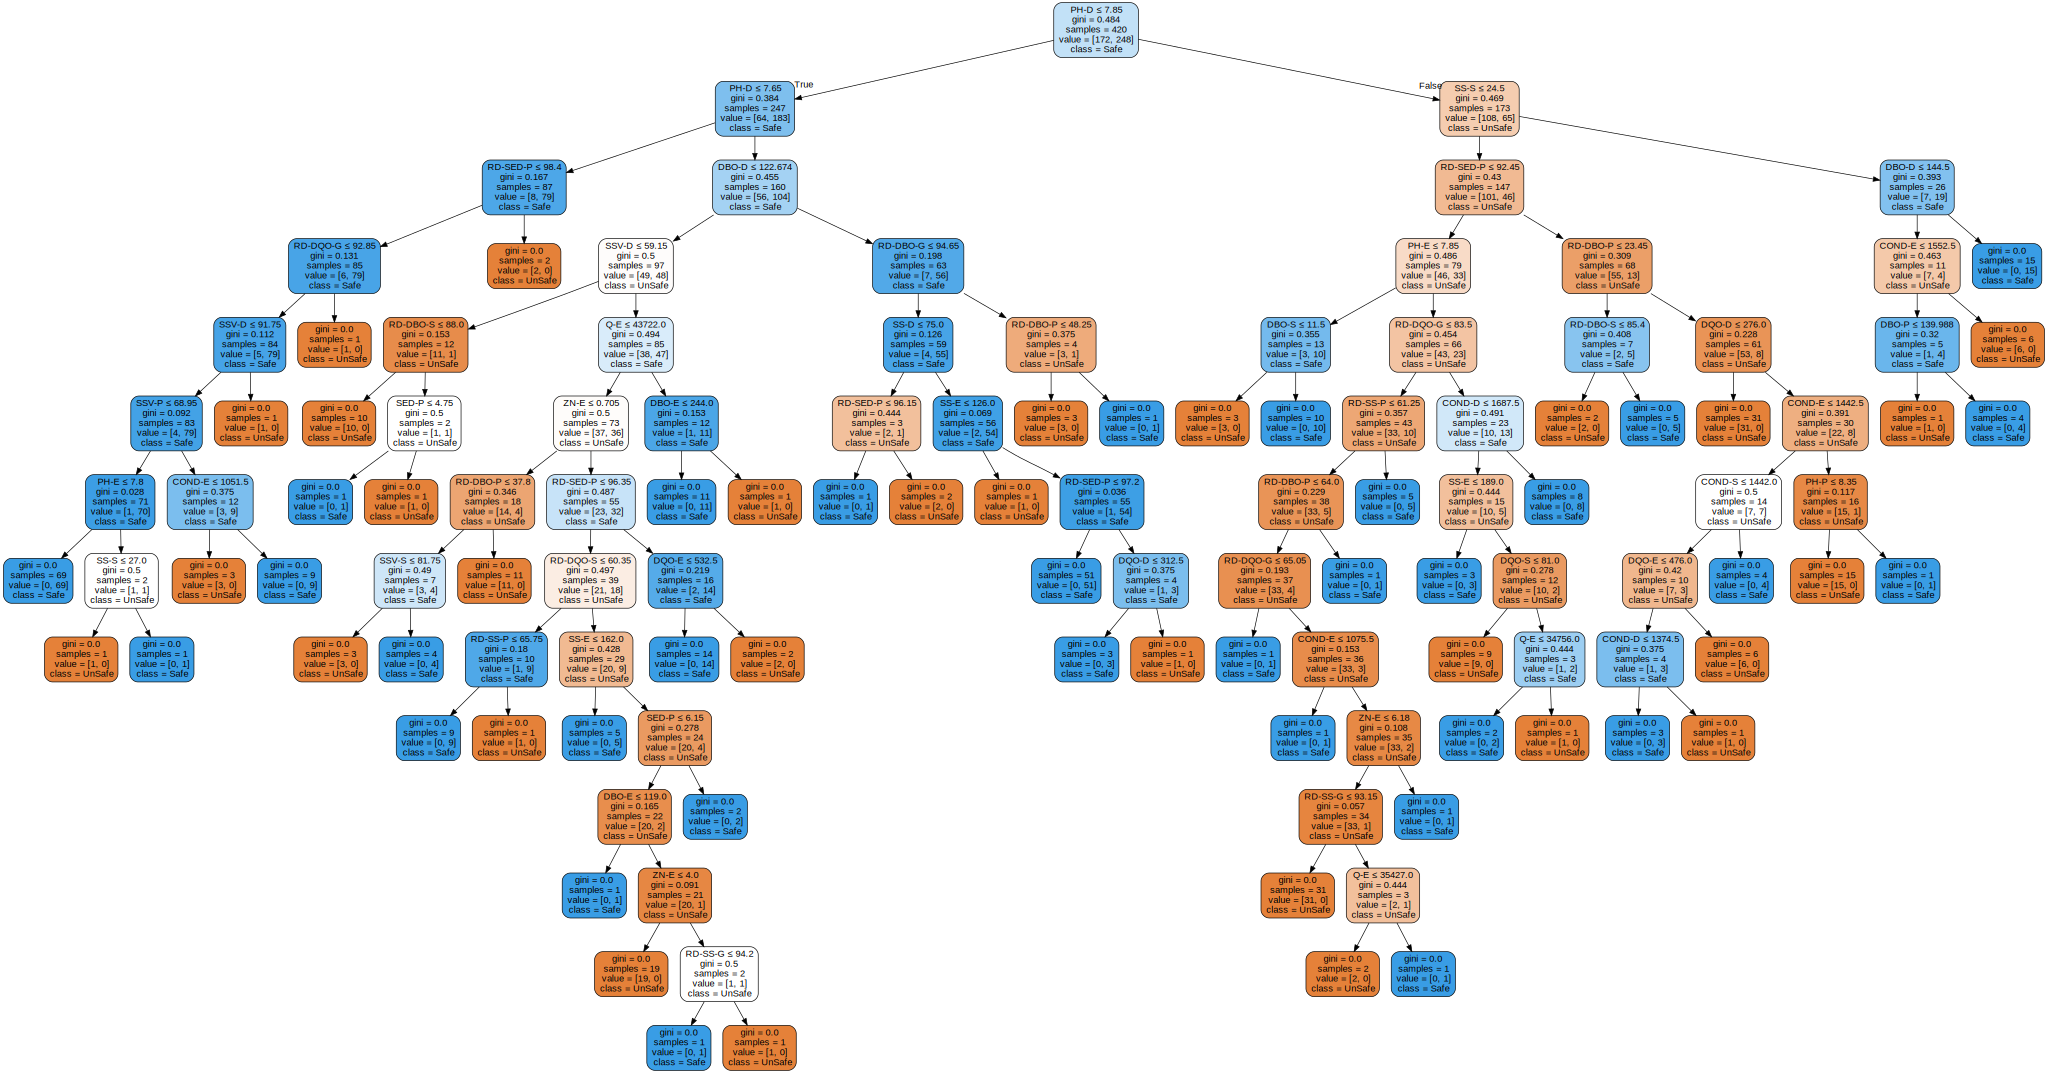

In [95]:
print("======== Experiment 01: All features (PH-S)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-S'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 02: All features (PH-E)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        68
           1       0.80      0.84      0.82        38

    accuracy                           0.87       106
   macro avg       0.85      0.86      0.86       106
weighted avg       0.87      0.87      0.87       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.852 (0.051)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        62
           1       0.79      0.86      0.83        44

    accuracy                           0.85       106
   macro avg       0.84      0.85      0.85       106
weighted avg       0.85      0.85      0.85       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.779 (0.038)
_______F

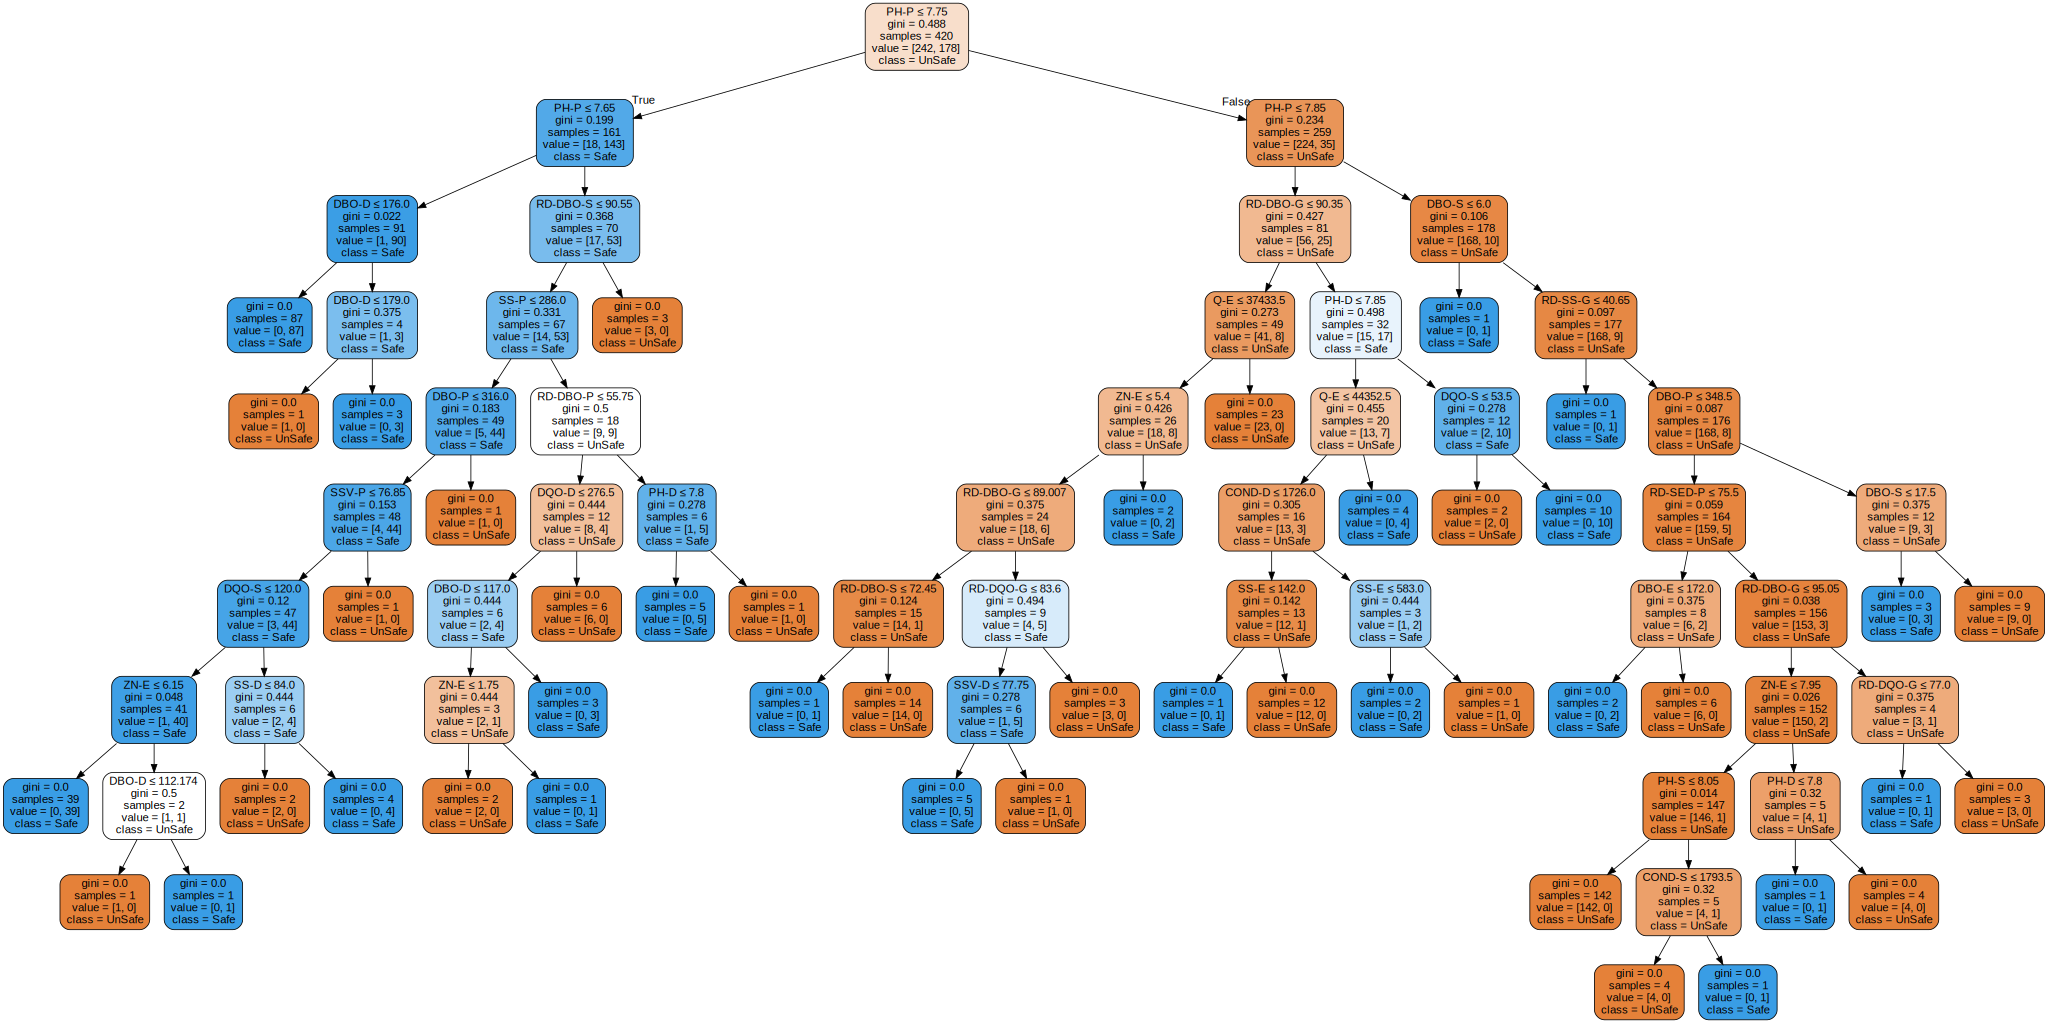

In [98]:
print("======== Experiment 02: All features (PH-E)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-E'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 03: Removing highly correlated features COND-S (PH-S)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.73      0.78      0.75        58

    accuracy                           0.72       106
   macro avg       0.72      0.71      0.71       106
weighted avg       0.72      0.72      0.72       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.717 (0.048)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        44
           1       0.71      0.77      0.74        62

    accuracy                           0.68       106
   macro avg       0.67      0.66      0.66       106
weighted avg       0.68      0.68      0.67       106

_____Performing 10 Cross Fold Validation______
Ac

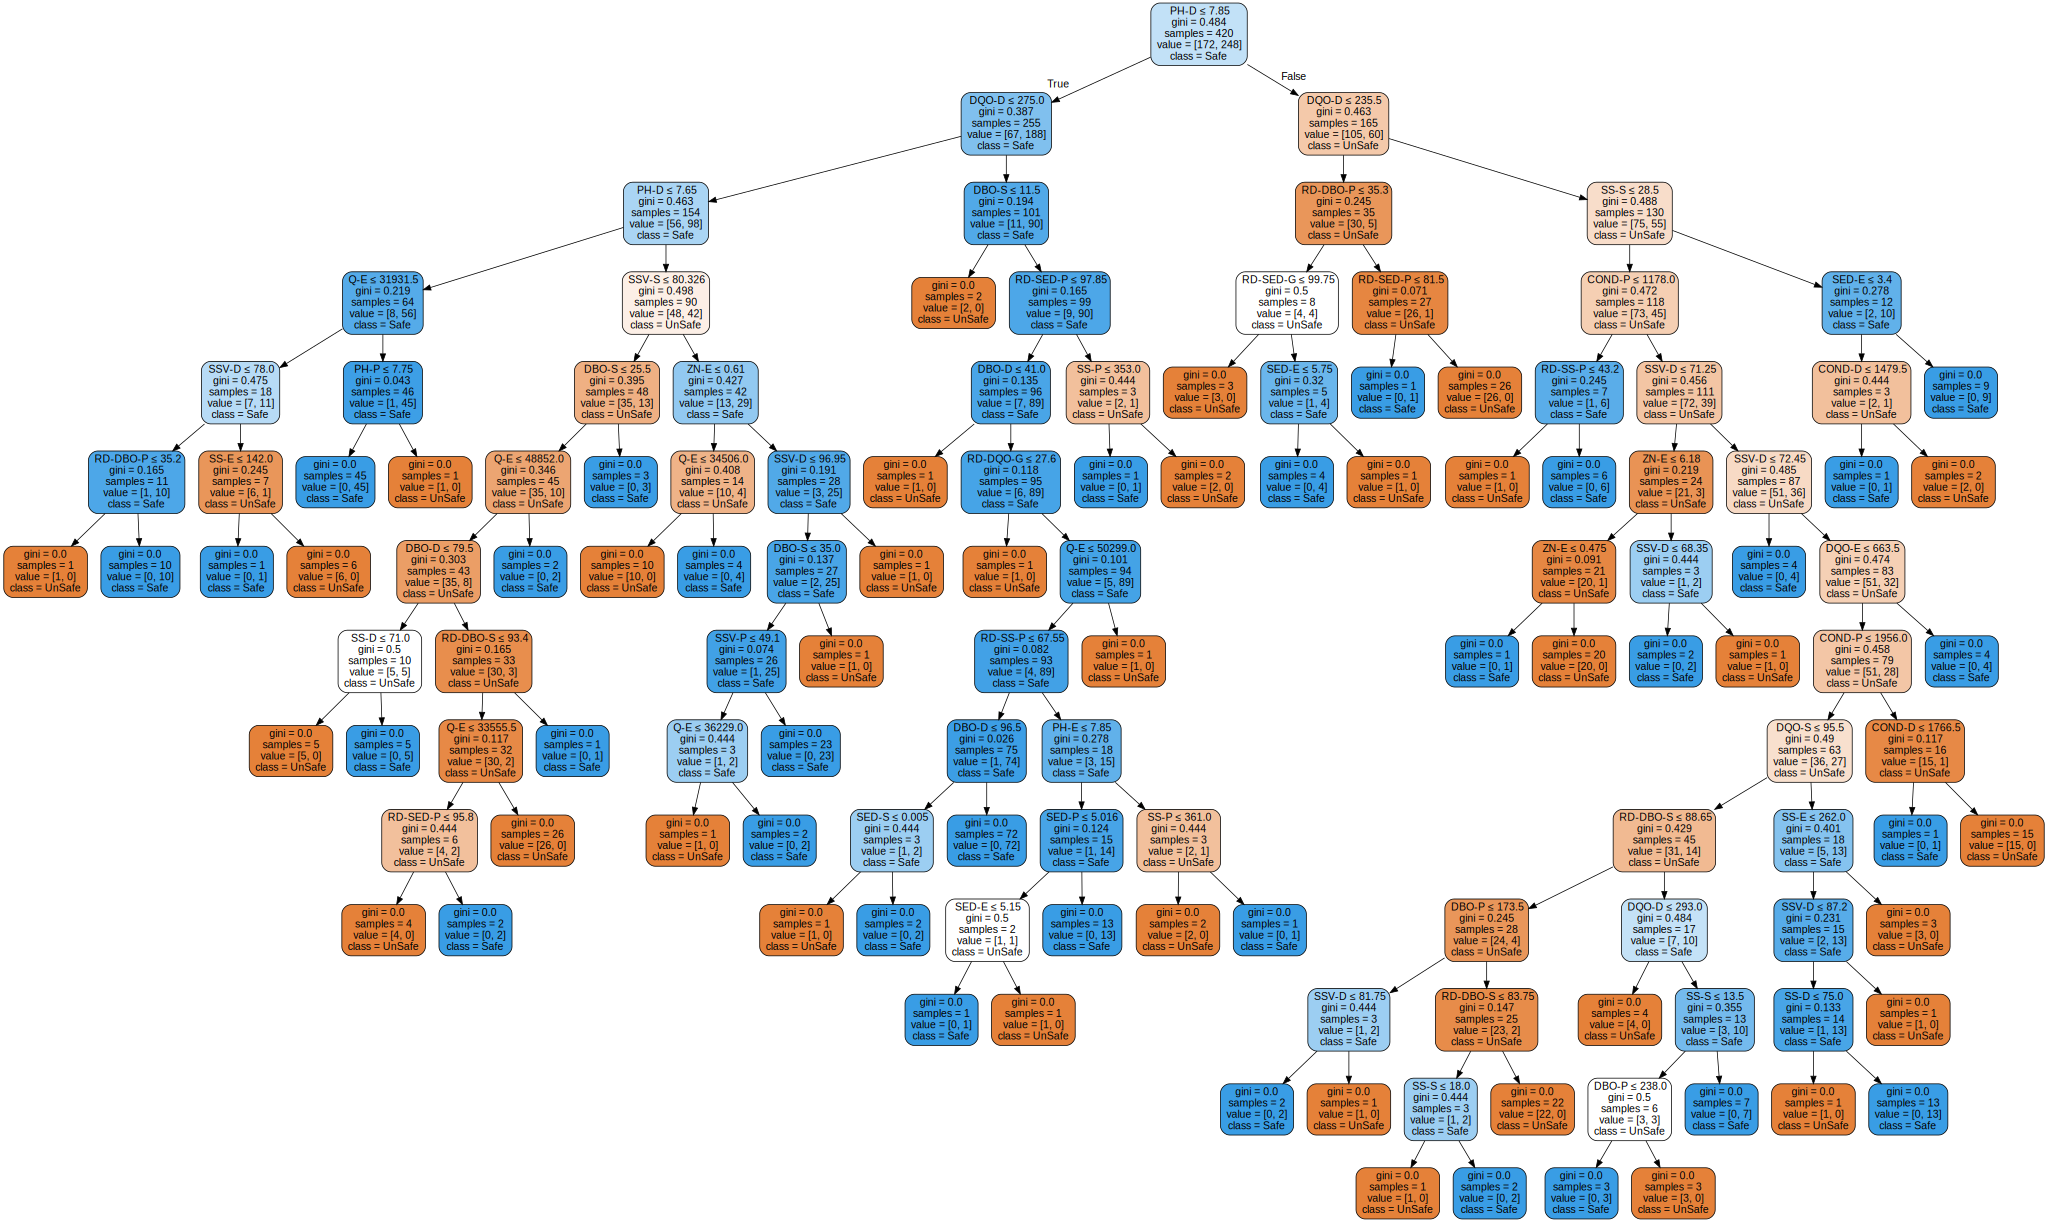

In [99]:
print("======== Experiment 03: Removing highly correlated features COND-S (PH-S)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0 and i.count('COND-S')==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-S'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0 and i.count('COND-S')==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 04: Removing highly correlated features COND-E (PH-E)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        65
           1       0.71      0.71      0.71        41

    accuracy                           0.77       106
   macro avg       0.76      0.76      0.76       106
weighted avg       0.77      0.77      0.77       106

_____Performing 10 Cross Fold Validation______
Accuracy: 0.850 (0.065)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        67
           1       0.69      0.69      0.69        39

    accuracy                           0.77       106
   macro avg       0.76      0.76      0.76       106
weighted avg       0.77      0.77      0.77       106

_____Performing 10 Cross Fold Validation______
Ac

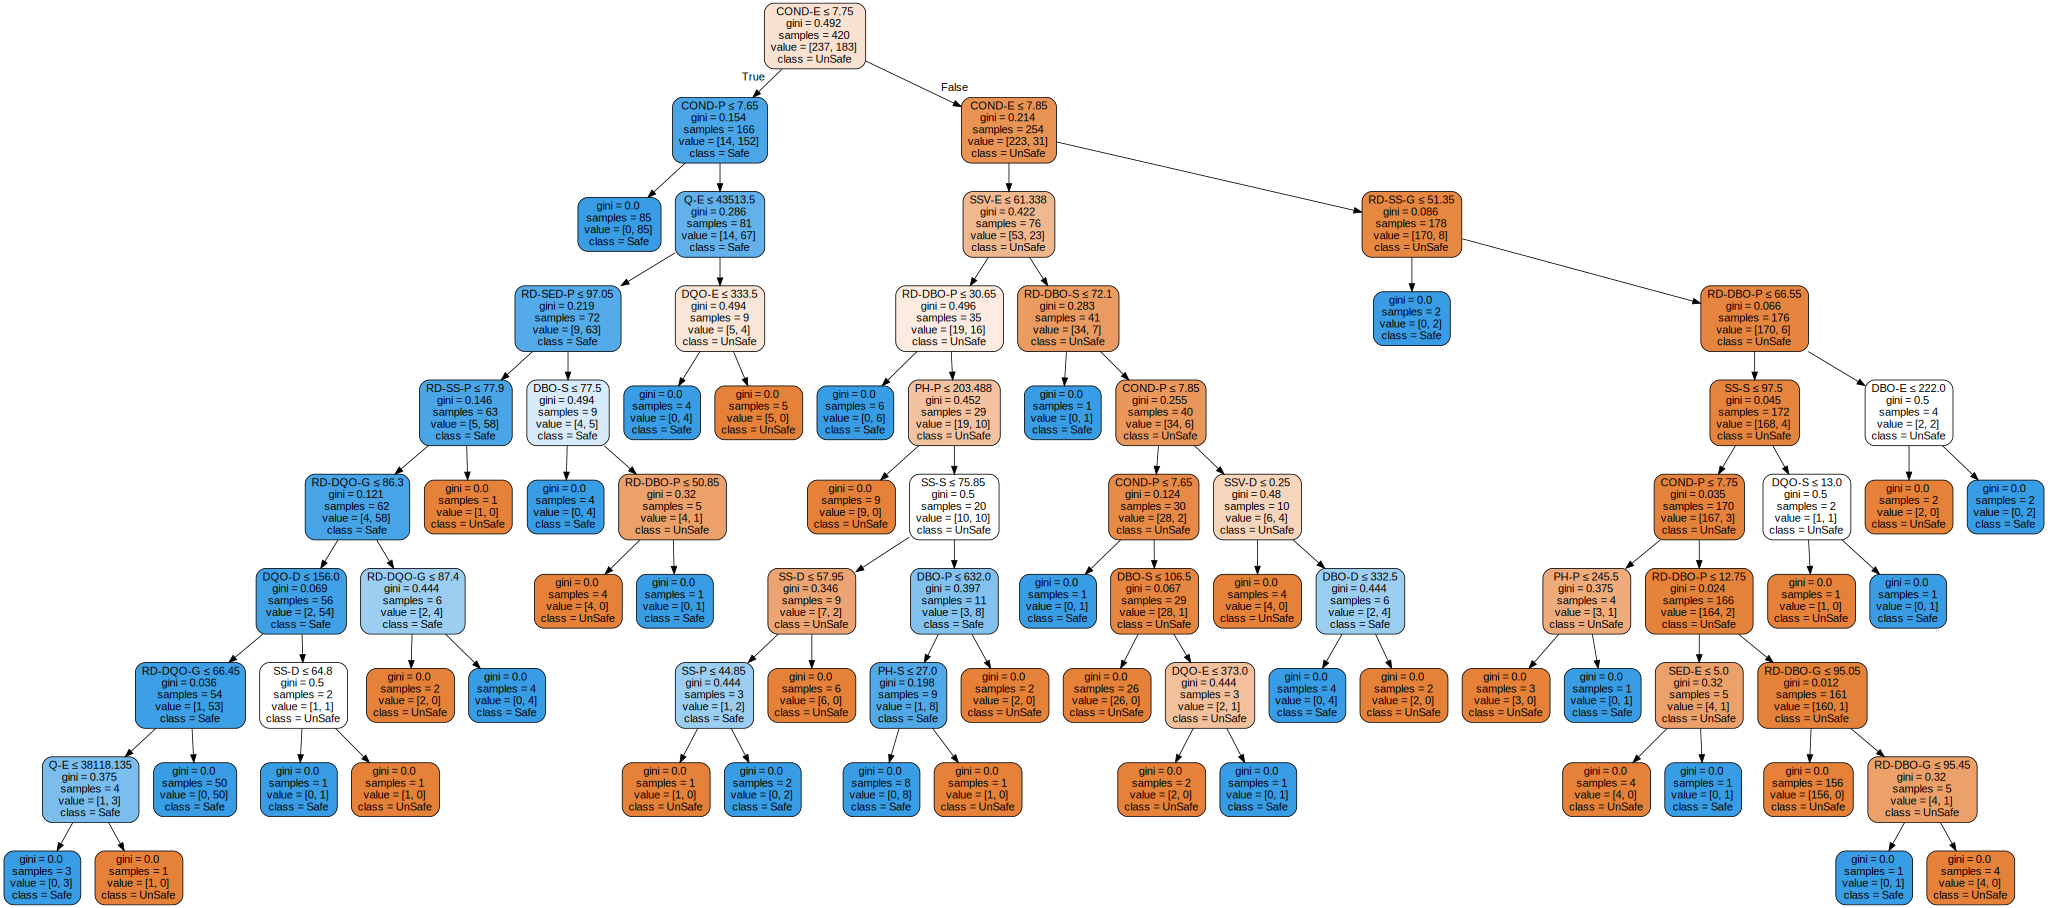

In [100]:
print("======== Experiment 04: Removing highly correlated features COND-E (PH-E)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0 and i.count('COND-E')==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-E'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0 and i.count('COND-S')==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

In [289]:
train_df = updated_df_nan.copy()
train_df = train_df.drop(['date'], axis=1)

======== Experiment 05: With Removed nan value rows All features (PH-S)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.77      0.82      0.79        44

    accuracy                           0.75        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76

_____Performing 10 Cross Fold Validation______
Accuracy: 0.678 (0.065)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        38
           1       0.60      0.74      0.66        38

    accuracy                           0.62        76
   macro avg       0.63      0.62      0.61        76
weighted avg       0.63      0.62      0.61        76

_____Performing 10 Cross Fold Validation______
Accu

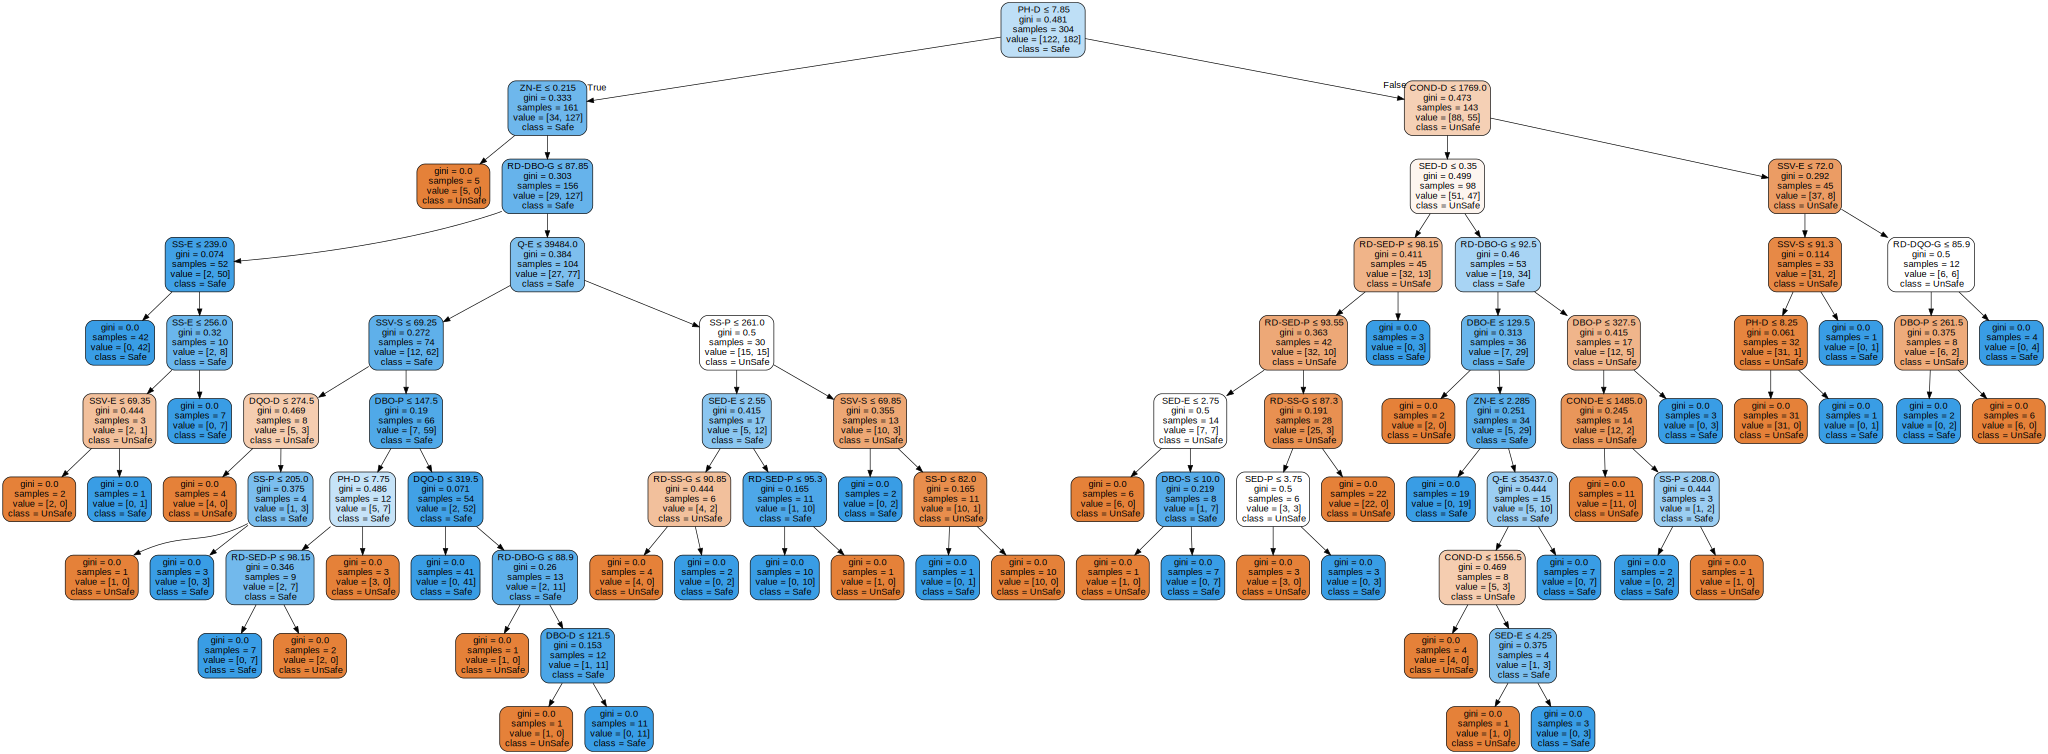

In [290]:
print("======== Experiment 05: With Removed nan value rows All features (PH-S)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-S'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 06: With Removed nan value rows All features (PH-E)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.74      0.83      0.78        30

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76

_____Performing 10 Cross Fold Validation______
Accuracy: 0.806 (0.051)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.76      0.74      0.75        38

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

_____Performing 10 Cross Fold Validation______
Accu

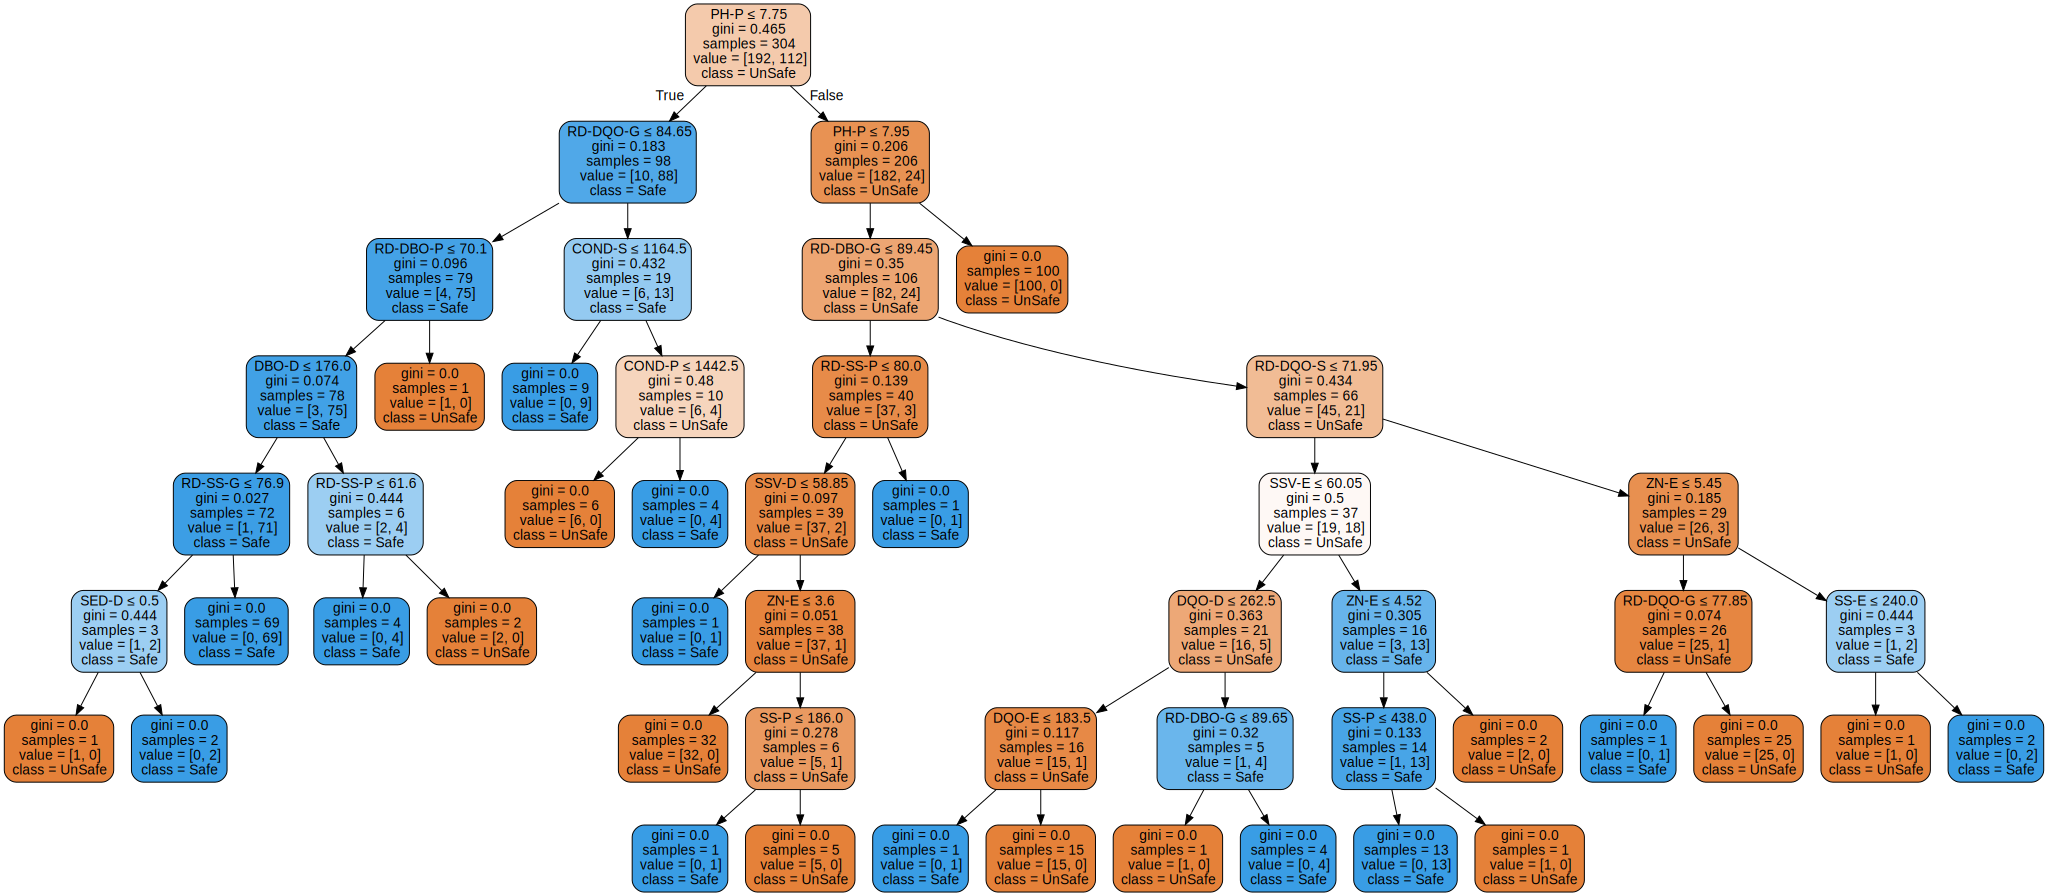

In [291]:
print("======== Experiment 06: With Removed nan value rows All features (PH-E)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-E'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 07: With Removed nan value rows Removing highly correlated features COND-S (PH-S)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        30
           1       0.74      0.74      0.74        46

    accuracy                           0.68        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.68      0.68      0.68        76

_____Performing 10 Cross Fold Validation______
Accuracy: 0.647 (0.096)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        43
           1       0.46      0.55      0.50        33

    accuracy                           0.53        76
   macro avg       0.53      0.53      0.52        76
weighted avg       0.54      0.53      0.53        76

_____Performing 10 Cr

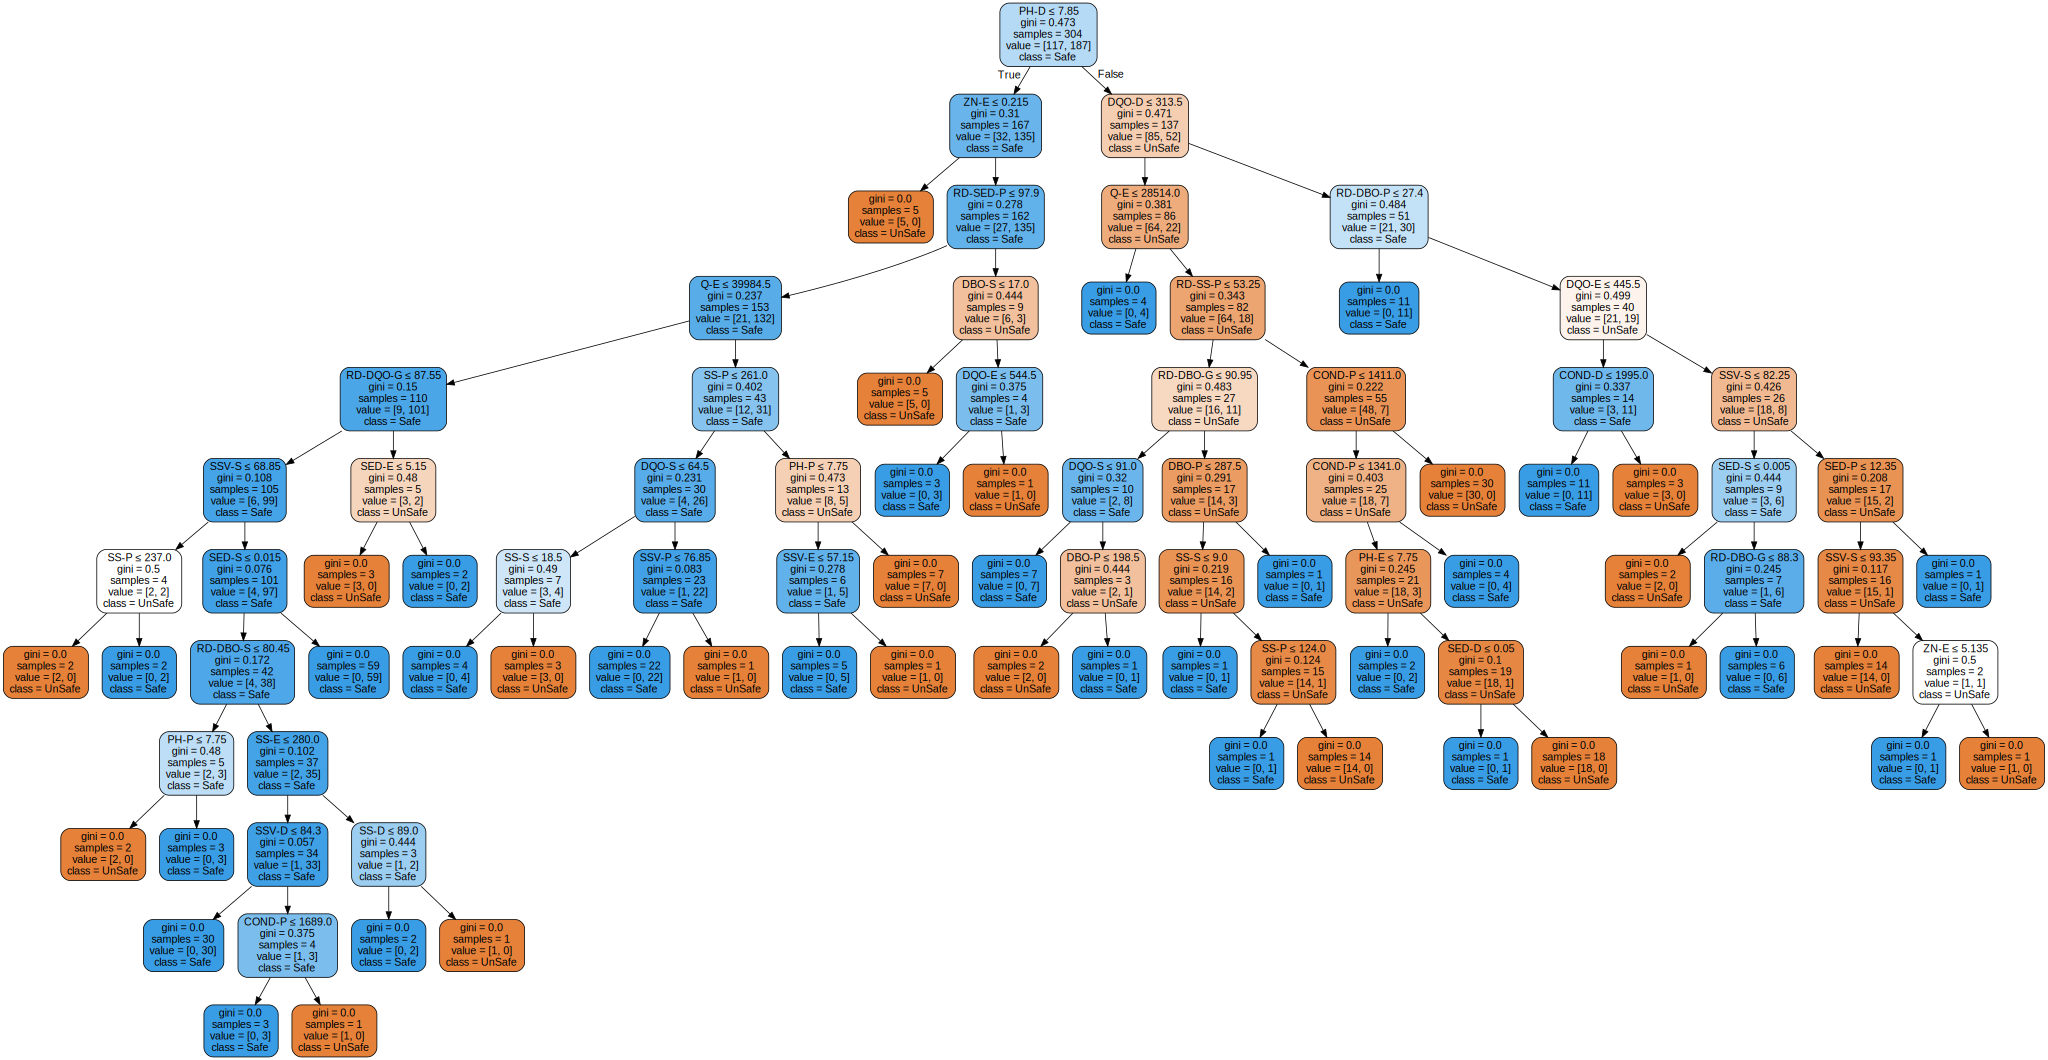

In [292]:
print("======== Experiment 07: With Removed nan value rows Removing highly correlated features COND-S (PH-S)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0 and i.count('COND-S')==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-S'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-S")==0 and i.count('COND-S')==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 08: With Removed nan value rows Removing highly correlated features COND-E (PH-E)======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.94      0.76      0.84        38

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.85        76
weighted avg       0.87      0.86      0.85        76

_____Performing 10 Cross Fold Validation______
Accuracy: 0.819 (0.089)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        49
           1       0.66      0.78      0.71        27

    accuracy                           0.78        76
   macro avg       0.76      0.78      0.76        76
weighted avg       0.79      0.78      0.78        76

_____Performing 10 Cr

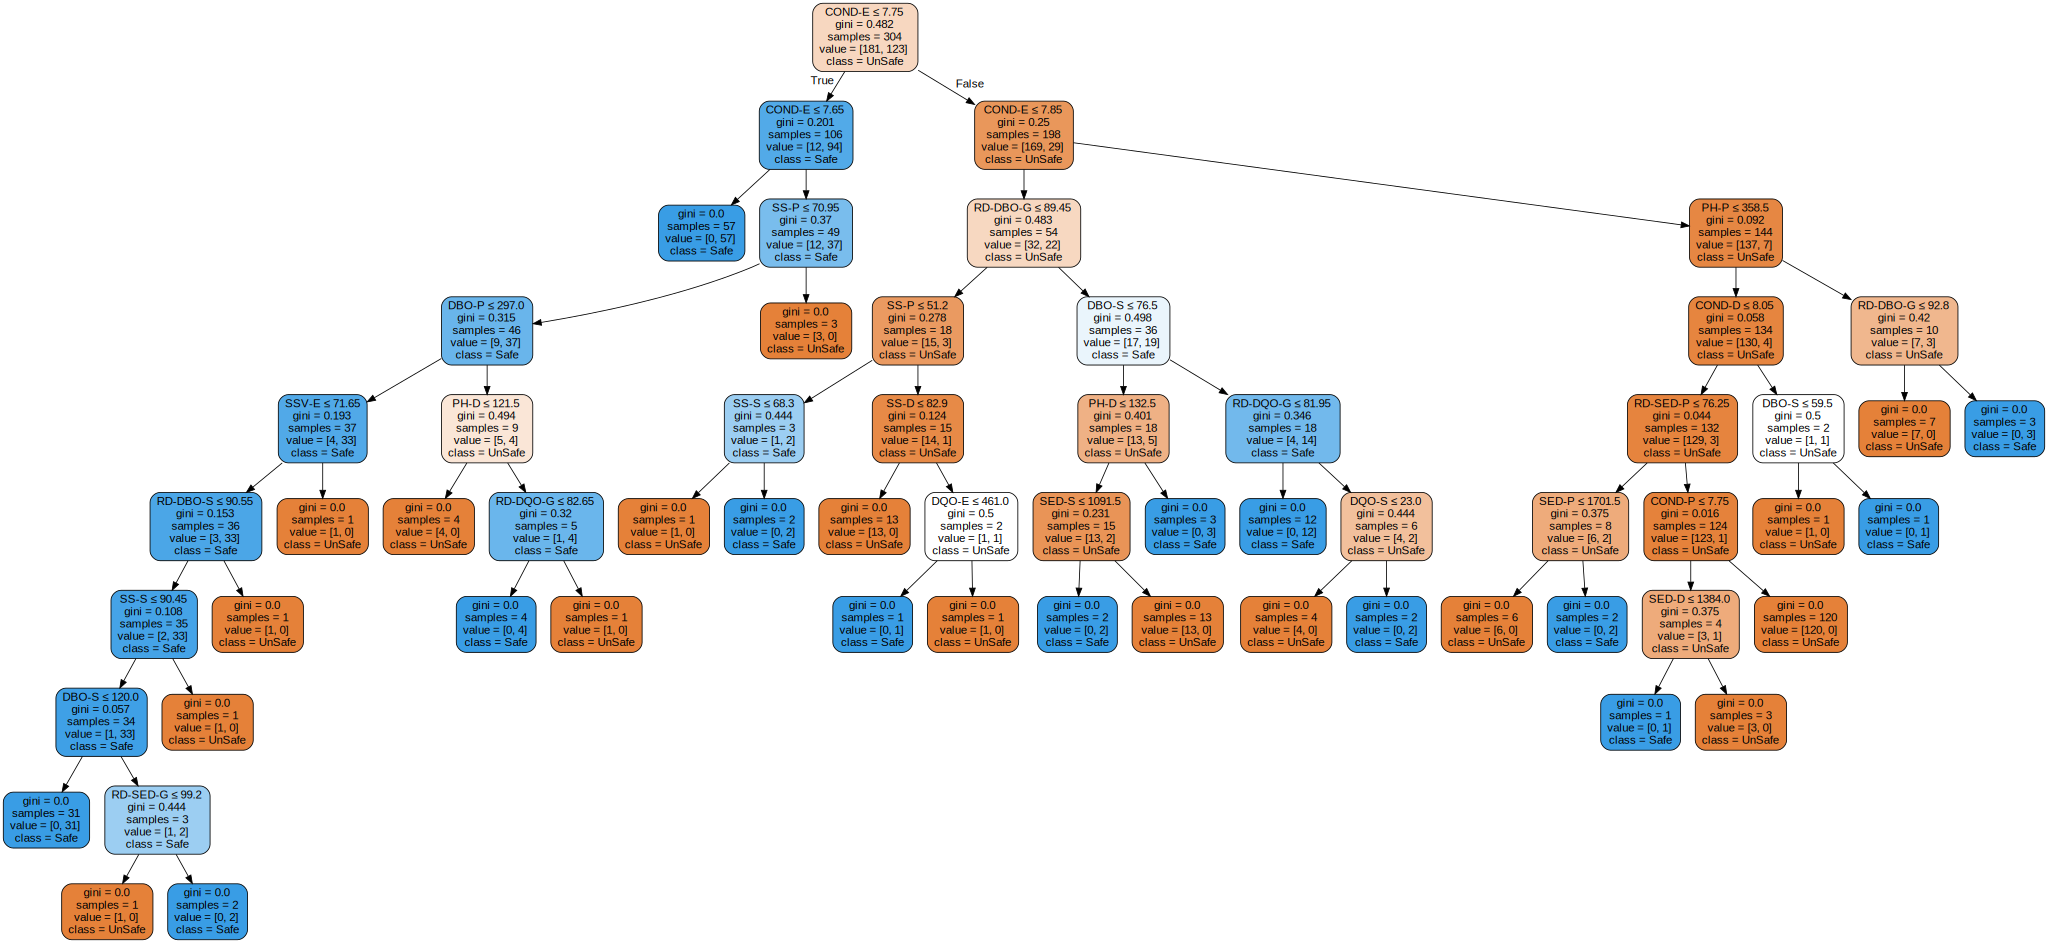

In [293]:
print("======== Experiment 08: With Removed nan value rows Removing highly correlated features COND-E (PH-E)======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0 and i.count('COND-E')==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-PH-E'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-")==0 and i.count("PH-E")==0 and i.count('COND-S')==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph

## Ques 03

### Part 01

In [296]:
df = pd.read_csv("data/WaterAtlas-Redownload.txt", delimiter="\t") #Reading the data into dataframe from the .txt file.

/Users/oldxchange/anaconda3/envs/kgconst/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (2,3,7,9,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [297]:
df = df[df['ValueQualifier']!='J'] # Removing all the rows with J. Estimated value questionable and not accurate.
# Ref: _WaterAtlas-ManySites_MGWorking_.xlsx

In [298]:
# Create a dataframe with all the station ID which has collected pH value.
check = df.copy()
check = check[check['Characteristic']=='pH']
check.head()

,DataSourceName,DataSourceCode,StationID,ActualStationID,Latitude_DD,Longitude_DD,SampleDate,SampleTime,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit,ValueQualifier,ResultComment,WaterbodyID,WaterbodyName
0,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.5,None,NaN,NaN,8509,Bugg Spring
18,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-03-10 00:00:00.000,00:00:00,NaN,NaN,pH,7.7,None,NaN,NaN,8509,Bugg Spring
27,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Arthur-Lake,NaN,28.62639,-81.84028,1998-04-04 00:00:00.000,00:00:00,NaN,NaN,pH,6.3,None,NaN,NaN,7950,"Arthur, Lake"
60,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.6,None,NaN,NaN,8509,Bugg Spring
85,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Church-Lake,NaN,28.64625,-81.84342,1995-02-13 00:00:00.000,00:00:00,NaN,NaN,pH,5.9,None,NaN,NaN,7844,Church Lake


In [299]:
# List of all the station id which has collected the pH value.
withphid = list(set(check['StationID'].values.tolist()))

In [300]:
# List of all the station IDs
allid = list(set(df['StationID'].values.tolist()))

In [301]:
# Creating the list of all the station ID which has not collected pH value.
withoutphid = list()
for i in allid:
    if i not in withphid:
        withoutphid.append(i)

In [302]:
# Creating a subset with data of only the station IDs which has collected pH value atleast once.
subset_ph = df.copy()
for id in withoutphid:
    subset_ph = subset_ph[subset_ph['StationID']!=id]

In [303]:
subset_ph.head()

,DataSourceName,DataSourceCode,StationID,ActualStationID,Latitude_DD,Longitude_DD,SampleDate,SampleTime,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit,ValueQualifier,ResultComment,WaterbodyID,WaterbodyName
0,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.5,None,NaN,NaN,8509,Bugg Spring
1,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Phosphorus as P,70.0,ug/l,NaN,NaN,8509,Bugg Spring
2,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,"Alkalinity, Total (total hydroxide+carbonate+b...",121.0,mg/l CaCO3,NaN,NaN,8509,Bugg Spring
3,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Specific conductance,270.0,umho,NaN,NaN,8509,Bugg Spring
4,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Nitrogen,670.0,ug/l,NaN,NaN,8509,Bugg Spring


In [304]:
subset_ph.describe()

,Latitude_DD,Longitude_DD,ActivityDepth,ResultValue,WaterbodyID
count,70059.000000,70059.000000,21117.000000,70010.000000,70059.000000
mean,28.743755,-81.877673,0.631611,55.908075,1049.021225
std,0.014505,0.013443,1.630933,215.124368,3279.604604
min,28.626390,-81.928919,0.100000,-29.570939,-9999.000000
25%,28.744200,-81.874853,0.500000,0.200000,1123.000000
50%,28.744200,-81.872800,0.500000,2.600000,1123.000000
75%,28.748033,-81.872800,0.500000,24.000000,1123.000000
max,28.754100,-81.840280,29.900000,14852.360000,8509.000000


In [305]:
subset_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70059 entries, 0 to 267778
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DataSourceName     70059 non-null  object 
 1   DataSourceCode     70059 non-null  object 
 2   StationID          70059 non-null  object 
 3   ActualStationID    3069 non-null   object 
 4   Latitude_DD        70059 non-null  float64
 5   Longitude_DD       70059 non-null  float64
 6   SampleDate         70059 non-null  object 
 7   SampleTime         21455 non-null  object 
 8   ActivityDepth      21117 non-null  float64
 9   ActivityDepthUnit  21236 non-null  object 
 10  Characteristic     70059 non-null  object 
 11  ResultValue        70010 non-null  float64
 12  ResultUnit         68463 non-null  object 
 13  ValueQualifier     8612 non-null   object 
 14  ResultComment      15881 non-null  object 
 15  WaterbodyID        70059 non-null  int64  
 16  WaterbodyName      70

In [306]:
# Removing all the irrelevant columns. 
# Not Removing Station ID and Sample Date which is further used to uniquely identify the measured Characteristic values.
subset_ph = subset_ph.drop(['DataSourceCode','DataSourceName','ActualStationID','SampleTime','ValueQualifier','ResultComment','WaterbodyID','WaterbodyName'],axis=1)

In [307]:
subset_ph.head()

,StationID,Latitude_DD,Longitude_DD,SampleDate,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit
0,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,NaN,pH,7.5,None
1,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,NaN,Phosphorus as P,70.0,ug/l
2,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,NaN,"Alkalinity, Total (total hydroxide+carbonate+b...",121.0,mg/l CaCO3
3,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,NaN,Specific conductance,270.0,umho
4,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,NaN,Nitrogen,670.0,ug/l


In [308]:
# Unique Column value which uniquely identifies the measured characteristic value by different station id over different dates.
subset_ph['uniqueColumn'] = [str(i)+"|"+str(j) for i,j in zip(subset_ph['StationID'].values.tolist(),subset_ph['SampleDate'].values.tolist())]

In [309]:
print(subset_ph.columns)
subset_ph = subset_ph.drop(['ActivityDepthUnit'],axis=1)
subset_ph.head()

Index(['StationID', 'Latitude_DD', 'Longitude_DD', 'SampleDate',
       'ActivityDepth', 'ActivityDepthUnit', 'Characteristic', 'ResultValue',
       'ResultUnit', 'uniqueColumn'],
      dtype='object')


,StationID,Latitude_DD,Longitude_DD,SampleDate,ActivityDepth,Characteristic,ResultValue,ResultUnit,uniqueColumn
0,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,pH,7.5,None,Bugg Springs-Lake|1991-08-18 00:00:00.000
1,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,Phosphorus as P,70.0,ug/l,Bugg Springs-Lake|1991-08-18 00:00:00.000
2,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,"Alkalinity, Total (total hydroxide+carbonate+b...",121.0,mg/l CaCO3,Bugg Springs-Lake|1991-08-18 00:00:00.000
3,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,Specific conductance,270.0,umho,Bugg Springs-Lake|1991-08-18 00:00:00.000
4,Bugg Springs-Lake,28.75361,-81.90444,1991-08-18 00:00:00.000,NaN,Nitrogen,670.0,ug/l,Bugg Springs-Lake|1991-08-18 00:00:00.000


In [310]:
print(len(set(subset_ph['Characteristic'])))
# pairvalue lists all the different characteristic which is calculated by all the different station ID over different dates.
pairvalue = subset_ph['Characteristic'].values.tolist()
print(len(set(pairvalue)))
pairvalue = list(set(pairvalue))

99
99


In [311]:
set_unique = subset_ph['uniqueColumn'].values.tolist()
set_unique = list(set(set_unique))

In [312]:
# Extract (value, unit) of all the characterisitic measured by an station ID on a specific date. 
final_list=list()
for unq_val in set_unique:
    top = {key:() for key in pairvalue+['Latitude_DD', 'Longitude_DD','ActivityDepth']}
    value_subset = subset_ph[subset_ph['uniqueColumn']==unq_val]
    for i,j in value_subset.iterrows():
        if(j[8]==unq_val):
            #print(j[1],j[2],j[3])
            top[j[5]]=(j[6],j[7])
            #print(top)
            #raise KeyboardInterrupt
            if(len(top['ActivityDepth'])==0):
                top['ActivityDepth'] = [j[4]]
            if(len(top['Latitude_DD'])==0):
                top['Latitude_DD'] = [j[1]]
            if(len(top['Longitude_DD'])==0):
                top['Longitude_DD'] = [j[2]]
    final_list.append(top)

In [313]:
len(final_list)

19420

In [314]:
fdf = pd.DataFrame(data=None, columns=["uniqueColumn"])

In [315]:
# Creating a dataframe, which consists of columns as different characteristic which can be calculated. 
# Rows value which uniquely identifies, the measured value by a Station ID on an specific date. 
fdf['uniqueColumn'] = set_unique
for i in pairvalue+['Latitude_DD', 'Longitude_DD','ActivityDepth']:
    top = list()
    for j in final_list:
        top.append(j[i])
    fdf[i] = top

/Users/oldxchange/anaconda3/envs/kgconst/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [316]:
fdf.head()

,uniqueColumn,"Alkalinity, Total (total hydroxide+carbonate+bicarbonate)",Total Inorganic Carbon,"Phosphorus, phosphate (PO4) as P",pH,Selenium,Boron,Flow,Aluminum,Strontium,...,Iron,Silica,"Elevation, water surface",Zinc,Wind velocity,Trophic State Index: Florida DEP,"Depth, bottom",Latitude_DD,Longitude_DD,ActivityDepth
0,02237293|1989-11-17 00:00:00.000,(),(),(),(),(),(),"(1.3, cfs)",(),(),...,(),(),(),(),(),(),(),[28.74419999],[-81.8728],[nan]
1,02237293|1982-02-21 00:00:00.000,(),(),(),(),(),(),"(3.5, cfs)",(),(),...,(),(),(),(),(),(),(),[28.74419999],[-81.8728],[nan]
2,02237293|1988-09-26 00:00:00.000,(),(),(),(),(),(),"(6.4, cfs)",(),(),...,(),(),(),(),(),(),(),[28.74419999],[-81.8728],[nan]
3,02237293|1999-06-26 00:00:00.000,(),(),(),(),(),(),"(1.3, cfs)",(),(),...,(),(),(),(),(),(),(),[28.74419999],[-81.8728],[nan]
4,02237293|2003-09-02 00:00:00.000,(),(),(),(),(),(),"(580.0, cfs)",(),(),...,(),(),(),(),(),(),(),[28.74419999],[-81.8728],[nan]


In [317]:
fdf_values = fdf.copy()

In [318]:
def value_extract(top):
    unit = list()
    #print(top)
    #raise KeyboardInterrupt
    for i in top:
        try:
            unit.append(i[1])
        except:
            unit.append("")
    check = list(set(unit))
    #print(check)
    #raise KeyboardInterrupt
    if('ug/l' in check and 'mg/l' in check):
        ntop = list()
        for i in top:
            try:
                if(i[1].count("mg/l")>0):
                    ntop.append(i[0]*1000)
                else:
                    ntop.append(i[0])
            except:
                ntop.append(np.nan)
    elif("mg/l" in check):
        ntop = list()
        for i in top:
            try:
                ntop.append(i[0]*1000)
            except:
                ntop.append(np.nan) 
    else:
        return False, list()
    
    return True, ntop

# updating fdf_values dataframe with just num values in the column.

for i in pairvalue+['Latitude_DD', 'Longitude_DD','ActivityDepth']:
    #print(fdf_values[i])
    flag, temp = value_extract(fdf_values[i])
    #print(flag, temp)
    #raise KeyboardInterrupt
    if(flag):
        fdf_values[i] = temp
    else:
        temp = list()
        for j in fdf_values[i]:
            try:
                temp.append(j[0])
            except:
                temp.append(np.nan)
        #print(temp)
        #raise KeyboardInterrupt
        fdf_values[i] = temp
        #print(fdf_values)
        #raise KeyboardInterrupt

In [319]:
fdf_values.head()

,uniqueColumn,"Alkalinity, Total (total hydroxide+carbonate+bicarbonate)",Total Inorganic Carbon,"Phosphorus, phosphate (PO4) as P",pH,Selenium,Boron,Flow,Aluminum,Strontium,...,Iron,Silica,"Elevation, water surface",Zinc,Wind velocity,Trophic State Index: Florida DEP,"Depth, bottom",Latitude_DD,Longitude_DD,ActivityDepth
0,02237293|1989-11-17 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7442,-81.8728,NaN
1,02237293|1982-02-21 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7442,-81.8728,NaN
2,02237293|1988-09-26 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7442,-81.8728,NaN
3,02237293|1999-06-26 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7442,-81.8728,NaN
4,02237293|2003-09-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,580.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7442,-81.8728,NaN


In [321]:
# Removing all the rows with nan values in the pH column.
fdf_values = fdf_values[fdf_values['pH'].notnull()]

In [322]:
fdf_values

,uniqueColumn,"Alkalinity, Total (total hydroxide+carbonate+bicarbonate)",Total Inorganic Carbon,"Phosphorus, phosphate (PO4) as P",pH,Selenium,Boron,Flow,Aluminum,Strontium,...,Iron,Silica,"Elevation, water surface",Zinc,Wind velocity,Trophic State Index: Florida DEP,"Depth, bottom",Latitude_DD,Longitude_DD,ActivityDepth
31,44530|2020-06-17 10:05:00.000,81.958860,NaN,31.2,7.20,5.000000,NaN,NaN,51.280000,64.271820,...,390.830000,6933.7,NaN,5.000000,NaN,NaN,1.312320,28.748033,-81.874853,0.5
48,44472|2015-09-02 11:45:00.000,139.598267,NaN,66.4,7.48,0.072285,NaN,NaN,10.269601,67.575222,...,38.087182,NaN,NaN,0.314189,1.7,NaN,3.051144,28.752500,-81.901667,0.5
228,79496|2010-05-17 10:58:00.000,134.000000,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.743889,-81.873056,0.5
239,420285|2016-02-23 12:14:00.000,182.301392,NaN,NaN,7.09,-0.055217,NaN,NaN,3.246315,66.619353,...,1142.584973,NaN,NaN,0.601295,NaN,NaN,NaN,28.750331,-81.928919,0.5
342,732|1989-02-07 00:00:00.000,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.6,4.921200,28.642111,-81.840597,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19360,44530|2008-07-01 08:20:00.000,120.368935,NaN,31.2,6.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,1.804440,28.748033,-81.874853,0.5
19373,79393|2016-02-23 09:08:00.000,119.186310,NaN,NaN,7.61,-0.073952,NaN,NaN,3.648172,56.184893,...,376.976796,NaN,NaN,0.284534,NaN,NaN,NaN,28.743889,-81.873056,0.5
19375,79092|2004-10-27 14:30:00.000,NaN,NaN,NaN,5.97,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.561600,28.754084,-81.875130,0.5
19383,79393|2014-06-24 09:56:00.000,118.736321,NaN,39.3,7.63,-2.559304,NaN,NaN,2.553735,64.472380,...,325.822600,NaN,NaN,5.903299,NaN,NaN,NaN,28.743889,-81.873056,0.5


In [323]:
# Addint the target variable value. SAFE-pH value, 0- unsafe, 1-safe. 
# Safe Range considered: 6.5 - 7.7
target_col = list()
for ph in fdf_values['pH'].values.tolist():
    if(ph>=6.5 and ph<=7.7):
        target_col.append(1)
    else:
        target_col.append(0)
fdf_values['SAFE-pH']=target_col 

### Part 02

In [324]:
# Converting all the numerical values to float
for col in fdf_values.columns:
    temp = fdf_values[col].values.tolist()
    temp_val = list()
    for i in temp:
        try:
            temp_val.append(float(i))
        except:
            temp_val.append(i)
    fdf_values[col] = temp_val

In [325]:
# Handling Nan values with the column mean value.
for col in list(fdf_values.columns):
    try:
        mean = fdf_values[col].mean()
        fdf_values[col] = fdf_values[col].fillna(mean)
    except TypeError:
        continue

In [326]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import graphviz 

def tencrossval(model,x_train, y_train):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

    return 0
    
def logreg(X,y):
    print("_____Classification 01 - Logistic Regression_______")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("_____Performing 10 Cross Fold Validation______")
    tencrossval(pipe, X_train, y_train)
    print("_______Finished Logestic Regression______ \n")

    return ""

def dt(X,y):
    print("_____Classification 02 - Decision Tree_______")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("_____Performing 10 Cross Fold Validation______")
    tencrossval(clf, X_train, y_train)
    print('_______Finished Decision Tree______')

    return clf

In [327]:
# Creating training data and removing all the irrelavant columns and the columns with no non-null value present in it.
train_df = fdf_values.copy()
train_df = train_df.drop(['uniqueColumn'], axis=1)

train_df = train_df.drop(['Elevation, water surface'], axis=1) # All null values
train_df = train_df.drop(['Total Inorganic Carbon'], axis=1) # All null values

train_df = train_df.drop(['pH'], axis=1) # Removing from training features.

for i in train_df.columns:
    if(str(mean(train_df[i].values.tolist()))=='nan'):
        train_df = train_df.drop([i],axis=1)

In [328]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 31 to 19399
Data columns (total 87 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Alkalinity, Total (total hydroxide+carbonate+bicarbonate)  523 non-null    float64
 1   Phosphorus, phosphate (PO4) as P                           523 non-null    float64
 2   Selenium                                                   523 non-null    float64
 3   Boron                                                      523 non-null    float64
 4   Flow                                                       523 non-null    float64
 5   Aluminum                                                   523 non-null    float64
 6   Strontium                                                  523 non-null    float64
 7   Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N               523 non-null    float64
 8   Molybde

In [329]:
train_df[['Latitude_DD','Longitude_DD','SAFE-pH']].to_csv("data/Training_Data.csv") # Creating dataset for Part 03 visualization.

======== Experiment 01: All features ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.72        32
         1.0       0.86      0.93      0.89        73

    accuracy                           0.85       105
   macro avg       0.83      0.79      0.81       105
weighted avg       0.84      0.85      0.84       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.749 (0.049)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.62      0.45      0.53        33
         1.0       0.78      0.88      0.82        72

    accuracy                           0.74       105
   macro avg       0.70      0.66      0.67       105
weighted avg       0.73      0.74      0.73       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.747 (0.053)
_______Finishe

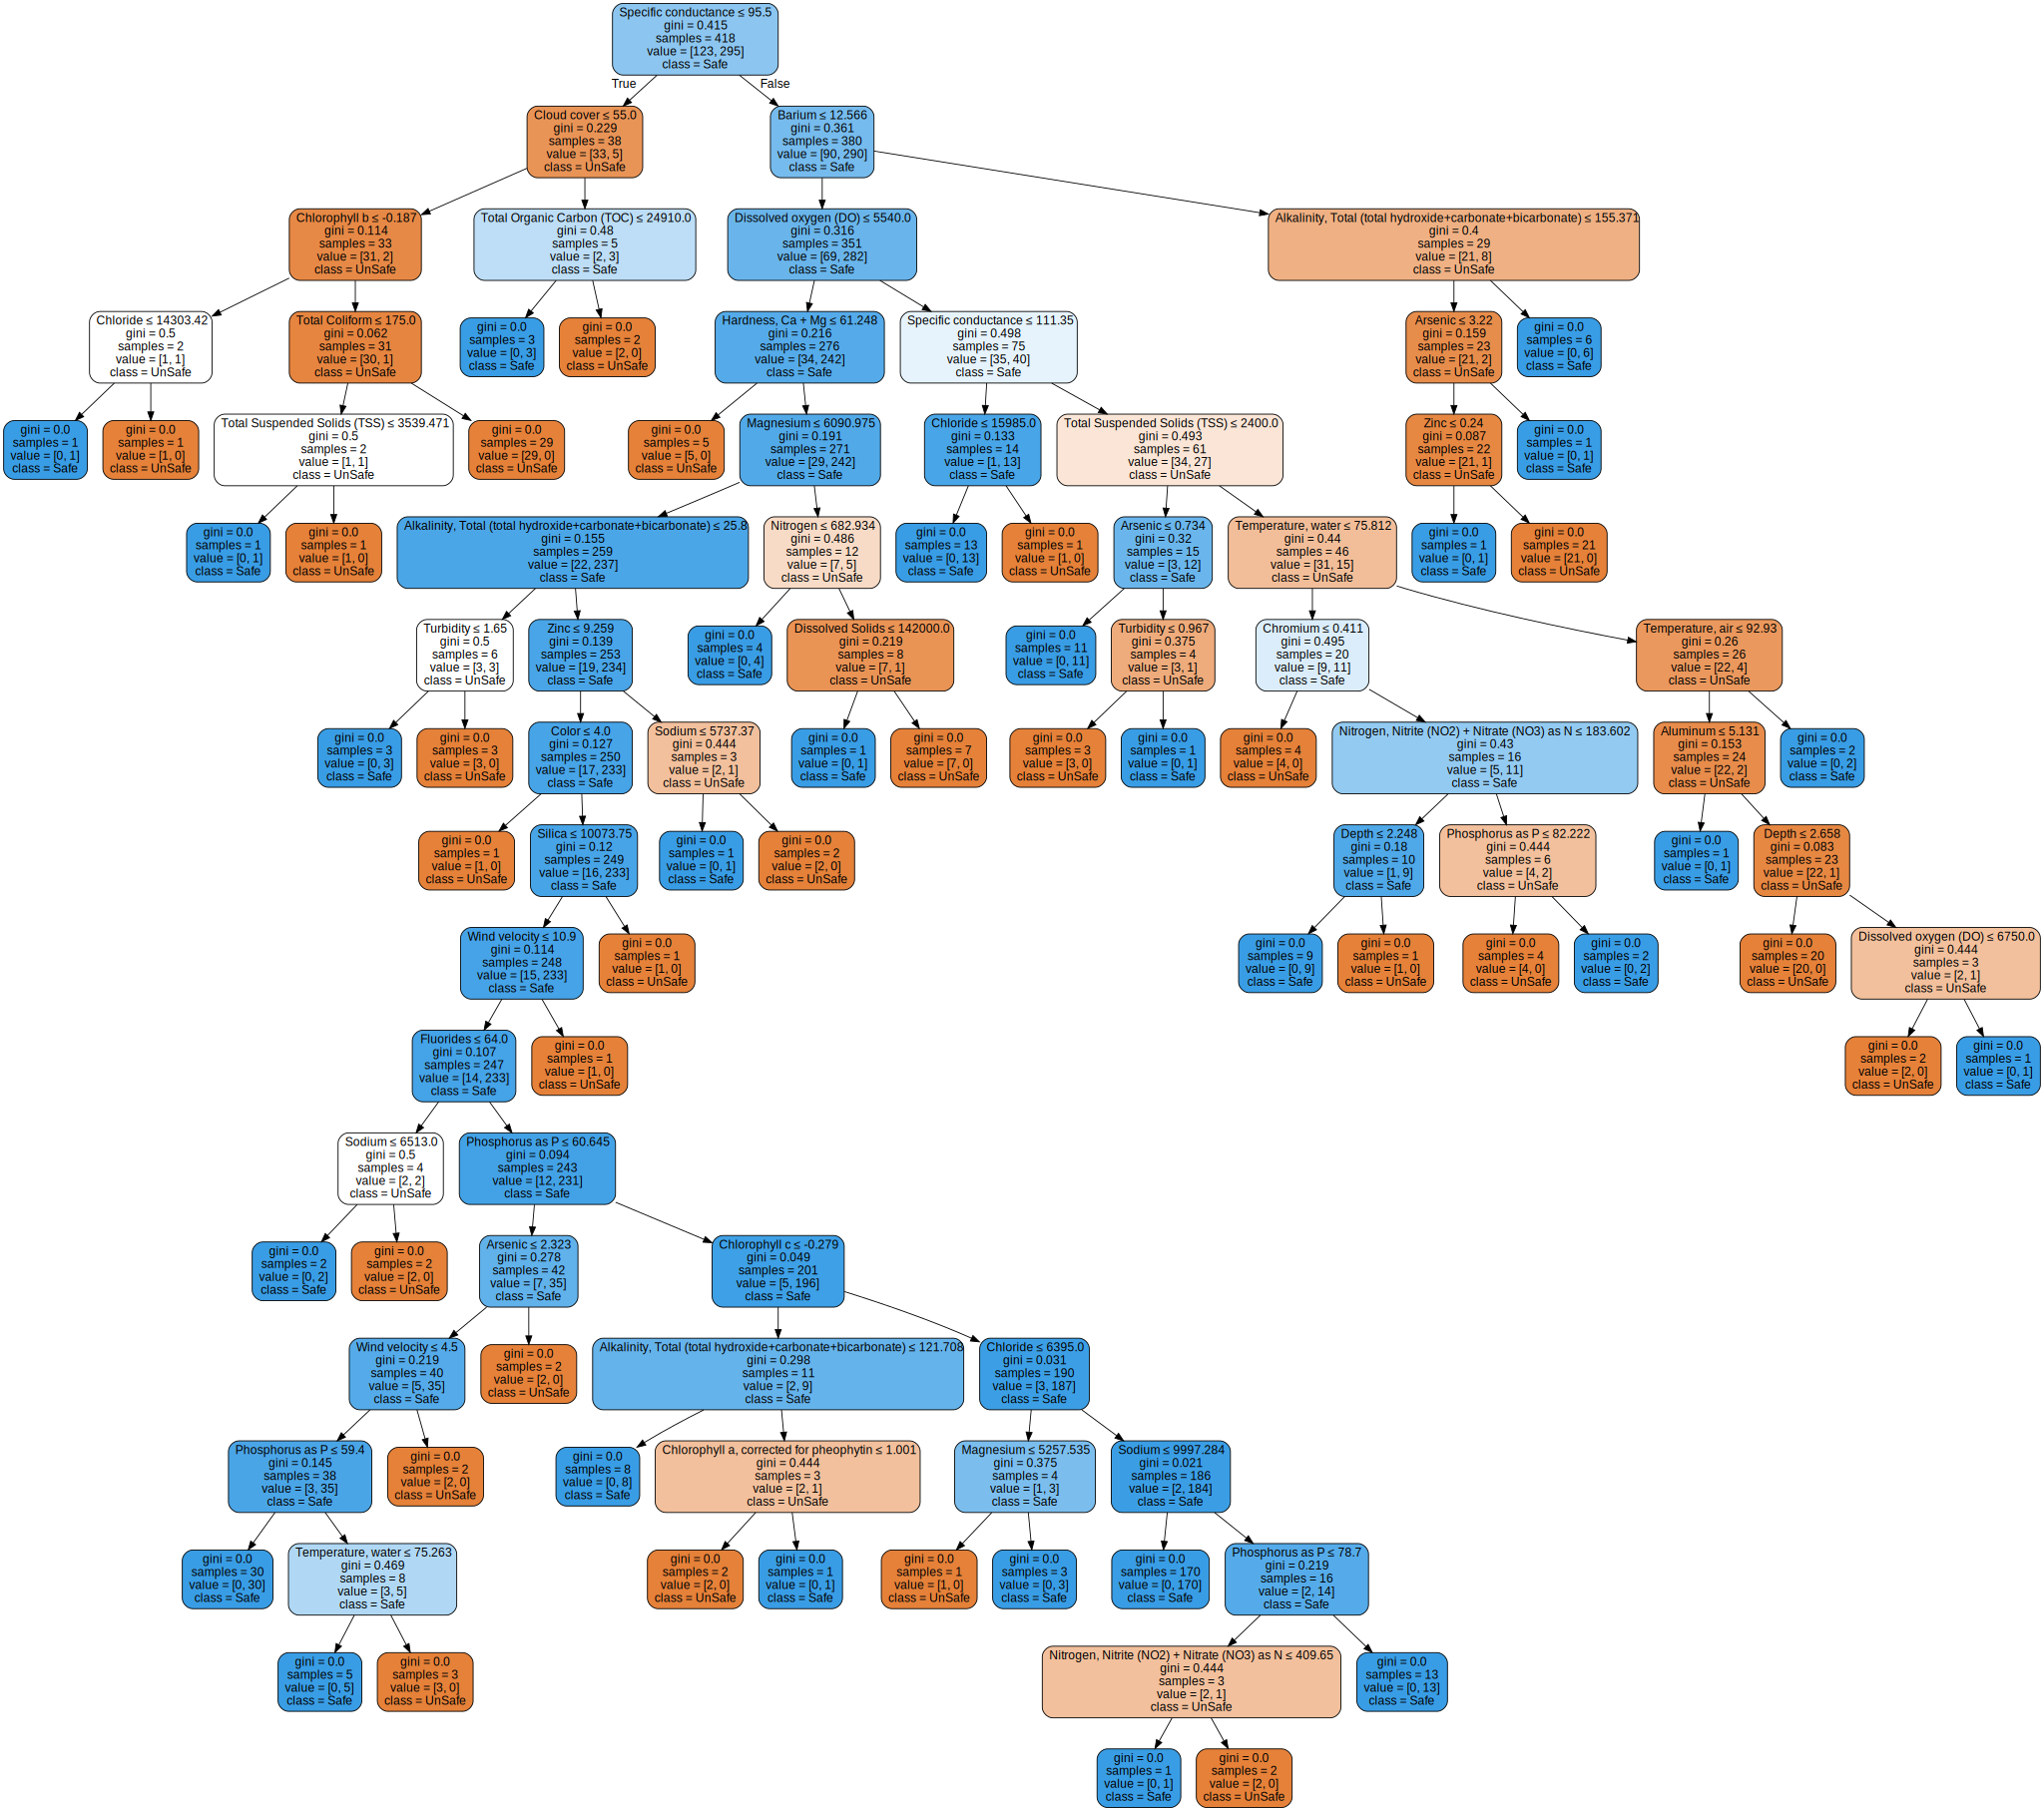

In [330]:
print("======== Experiment 01: All features ======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-pH")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-pH")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

In [331]:
train_df = train_df.drop(['Latitude_DD', 'Longitude_DD'], axis=1)

======== Experiment 02: Without Latitude and Longitude ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60        35
         1.0       0.79      0.87      0.83        70

    accuracy                           0.76       105
   macro avg       0.74      0.71      0.72       105
weighted avg       0.75      0.76      0.75       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.751 (0.067)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67        24
         1.0       0.89      0.93      0.91        81

    accuracy                           0.86       105
   macro avg       0.80      0.78      0.79       105
weighted avg       0.85      0.86      0.85       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.737 (0.0

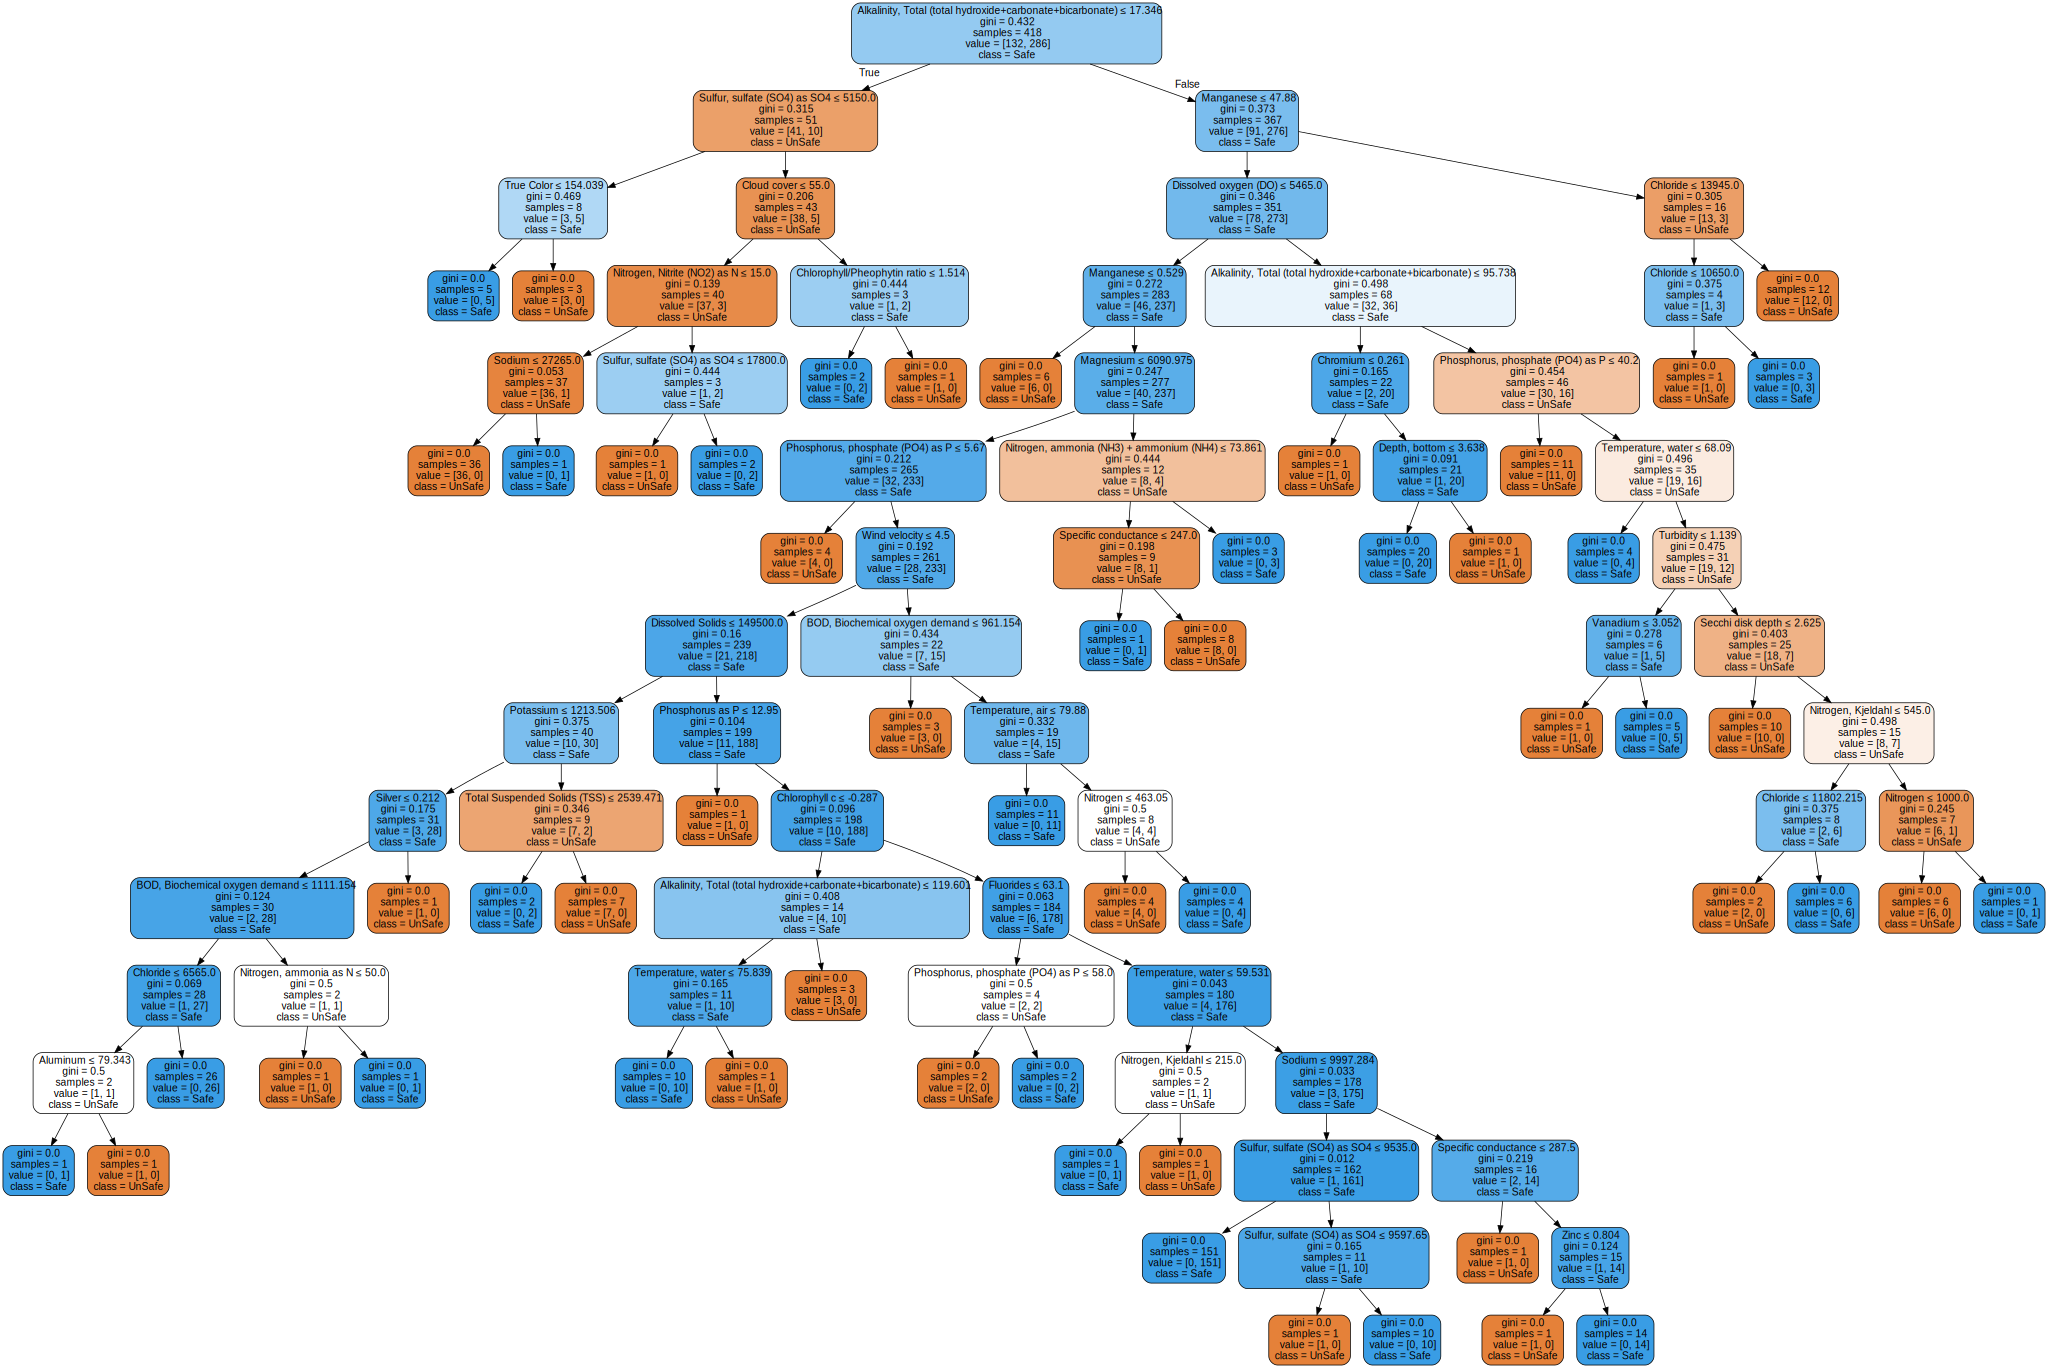

In [332]:
print("======== Experiment 02: Without Latitude and Longitude ======== \n")

X = train_df[[i for i in list(train_df.columns) if i.count("SAFE-pH")==0]].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=[i for i in list(train_df.columns) if i.count("SAFE-pH")==0],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

In [333]:
train_df.columns

Index(['Alkalinity, Total (total hydroxide+carbonate+bicarbonate)',
       'Phosphorus, phosphate (PO4) as P', 'Selenium', 'Boron', 'Flow',
       'Aluminum', 'Strontium', 'Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N',
       'Molybdenum', 'Potassium', 'Thallium', 'Antimony',
       'Chlorophyll a, corrected for pheophytin', 'Dissolved Solids',
       'Weather condition (WMO code 4677) (choice list)',
       'Enterococcus Group Bacteria', 'Total Organic Carbon (TOC)',
       'Phosphorus as P', 'Nitrogen, ammonia (NH3) as NH3',
       'Volatile Suspended Solids', 'Lead', 'Secchi disk depth',
       'Silicon as Si', 'Depth', 'Silicate', 'Color', 'Chlorophyll b',
       'Arsenic', 'Nitrogen, Nitrite (NO2) as N', 'Radium-226',
       'BOD, Biochemical oxygen demand', 'Hardness, Ca + Mg',
       'Specific conductance', 'Turbidity', 'Chlorophyll/Pheophytin ratio',
       'Nitrogen, Nitrate (NO3) as N', 'Total Suspended Solids (TSS)',
       'Pheophytin-a', 'Sulfur, sulfate (SO4) as SO4', 'S

======== Experiment 03: Higher Feature values - low pH Value ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.70      0.23      0.35        30
         1.0       0.76      0.96      0.85        75

    accuracy                           0.75       105
   macro avg       0.73      0.60      0.60       105
weighted avg       0.74      0.75      0.71       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.723 (0.045)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.52      0.37      0.43        30
         1.0       0.77      0.87      0.82        75

    accuracy                           0.72       105
   macro avg       0.65      0.62      0.62       105
weighted avg       0.70      0.72      0.71       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.70

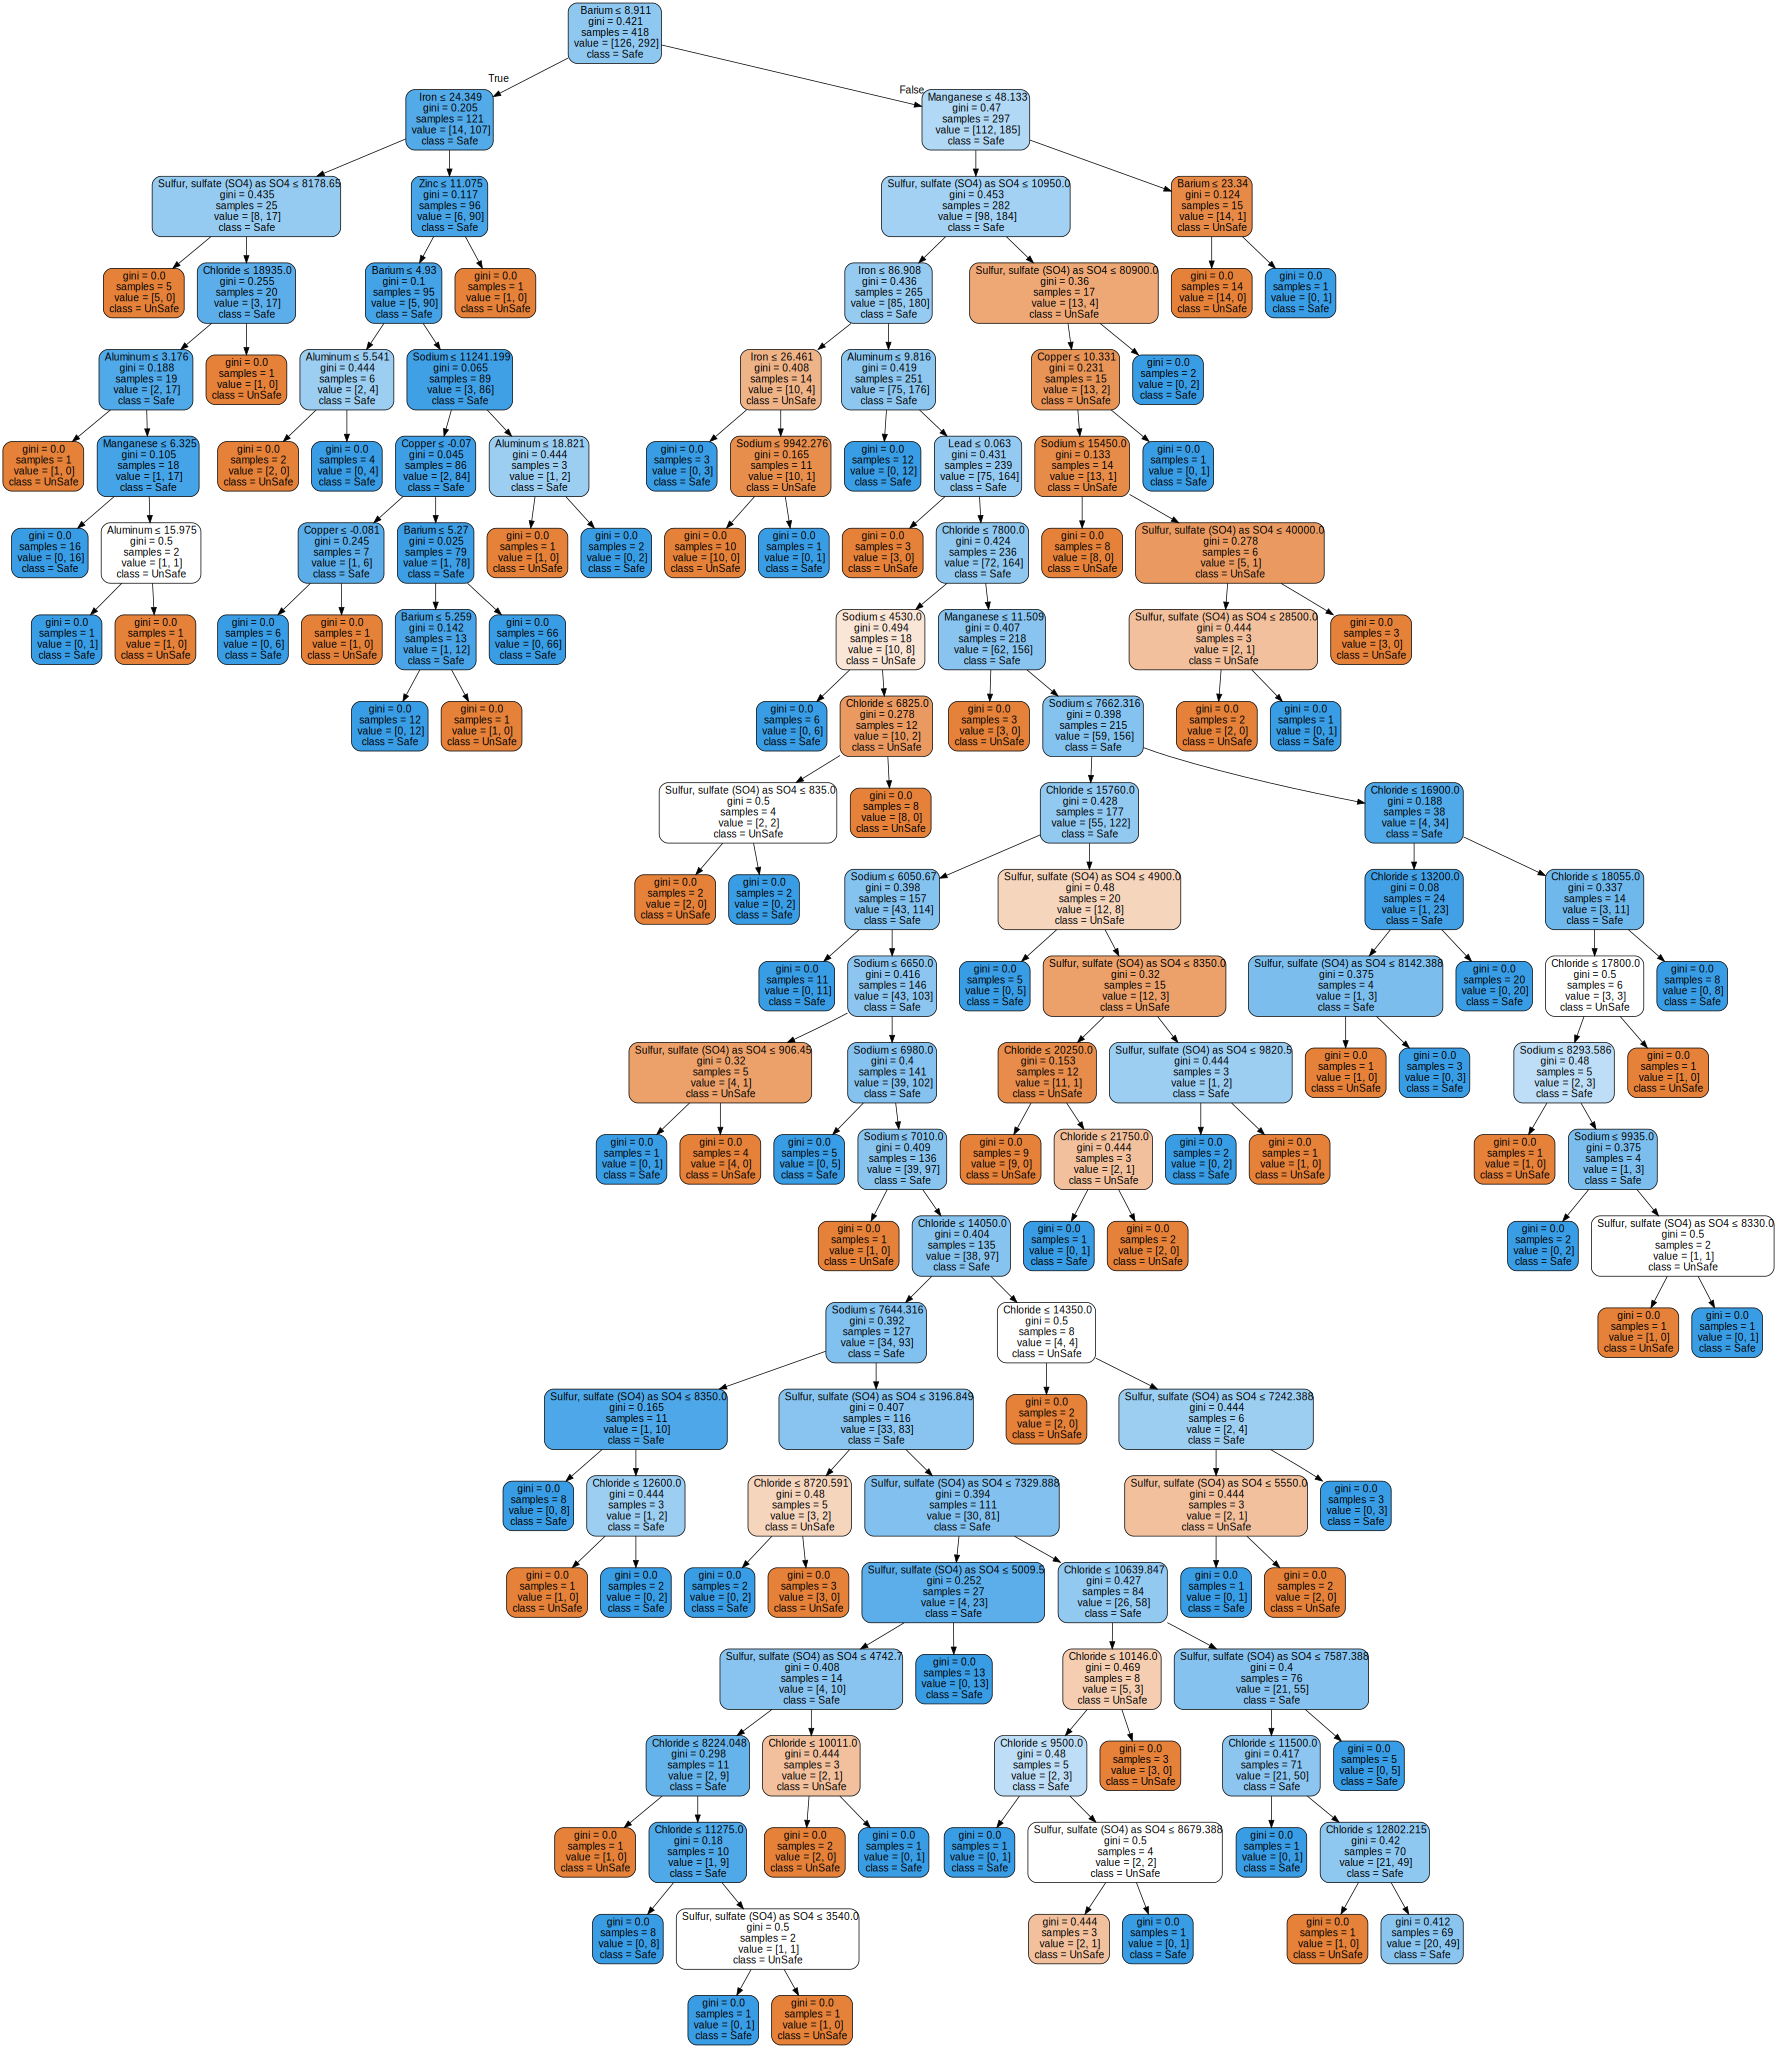

In [334]:
print("======== Experiment 03: Higher Feature values - low pH Value ======== \n") # Ref Page 6-11 AnalysisofFeatures.pdf

X = train_df[['Aluminum', 'Lead', 'Mercury', 'Iron', 'Manganese', 'Copper', 'Zinc', 'Barium',  'Chloride', 'Sulfur, sulfate (SO4) as SO4', 'Sodium']].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Aluminum', 'Lead', 'Mercury', 'Iron', 'Manganese', 'Copper', 'Zinc', 'Barium',  'Chloride', 'Sulfur, sulfate (SO4) as SO4', 'Sodium'],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 04: Increase in Alkalinity - pH Increases ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.78      0.46      0.58        39
         1.0       0.74      0.92      0.82        66

    accuracy                           0.75       105
   macro avg       0.76      0.69      0.70       105
weighted avg       0.76      0.75      0.73       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.756 (0.074)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63        25
         1.0       0.89      0.85      0.87        80

    accuracy                           0.81       105
   macro avg       0.74      0.77      0.75       105
weighted avg       0.82      0.81      0.81       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.6

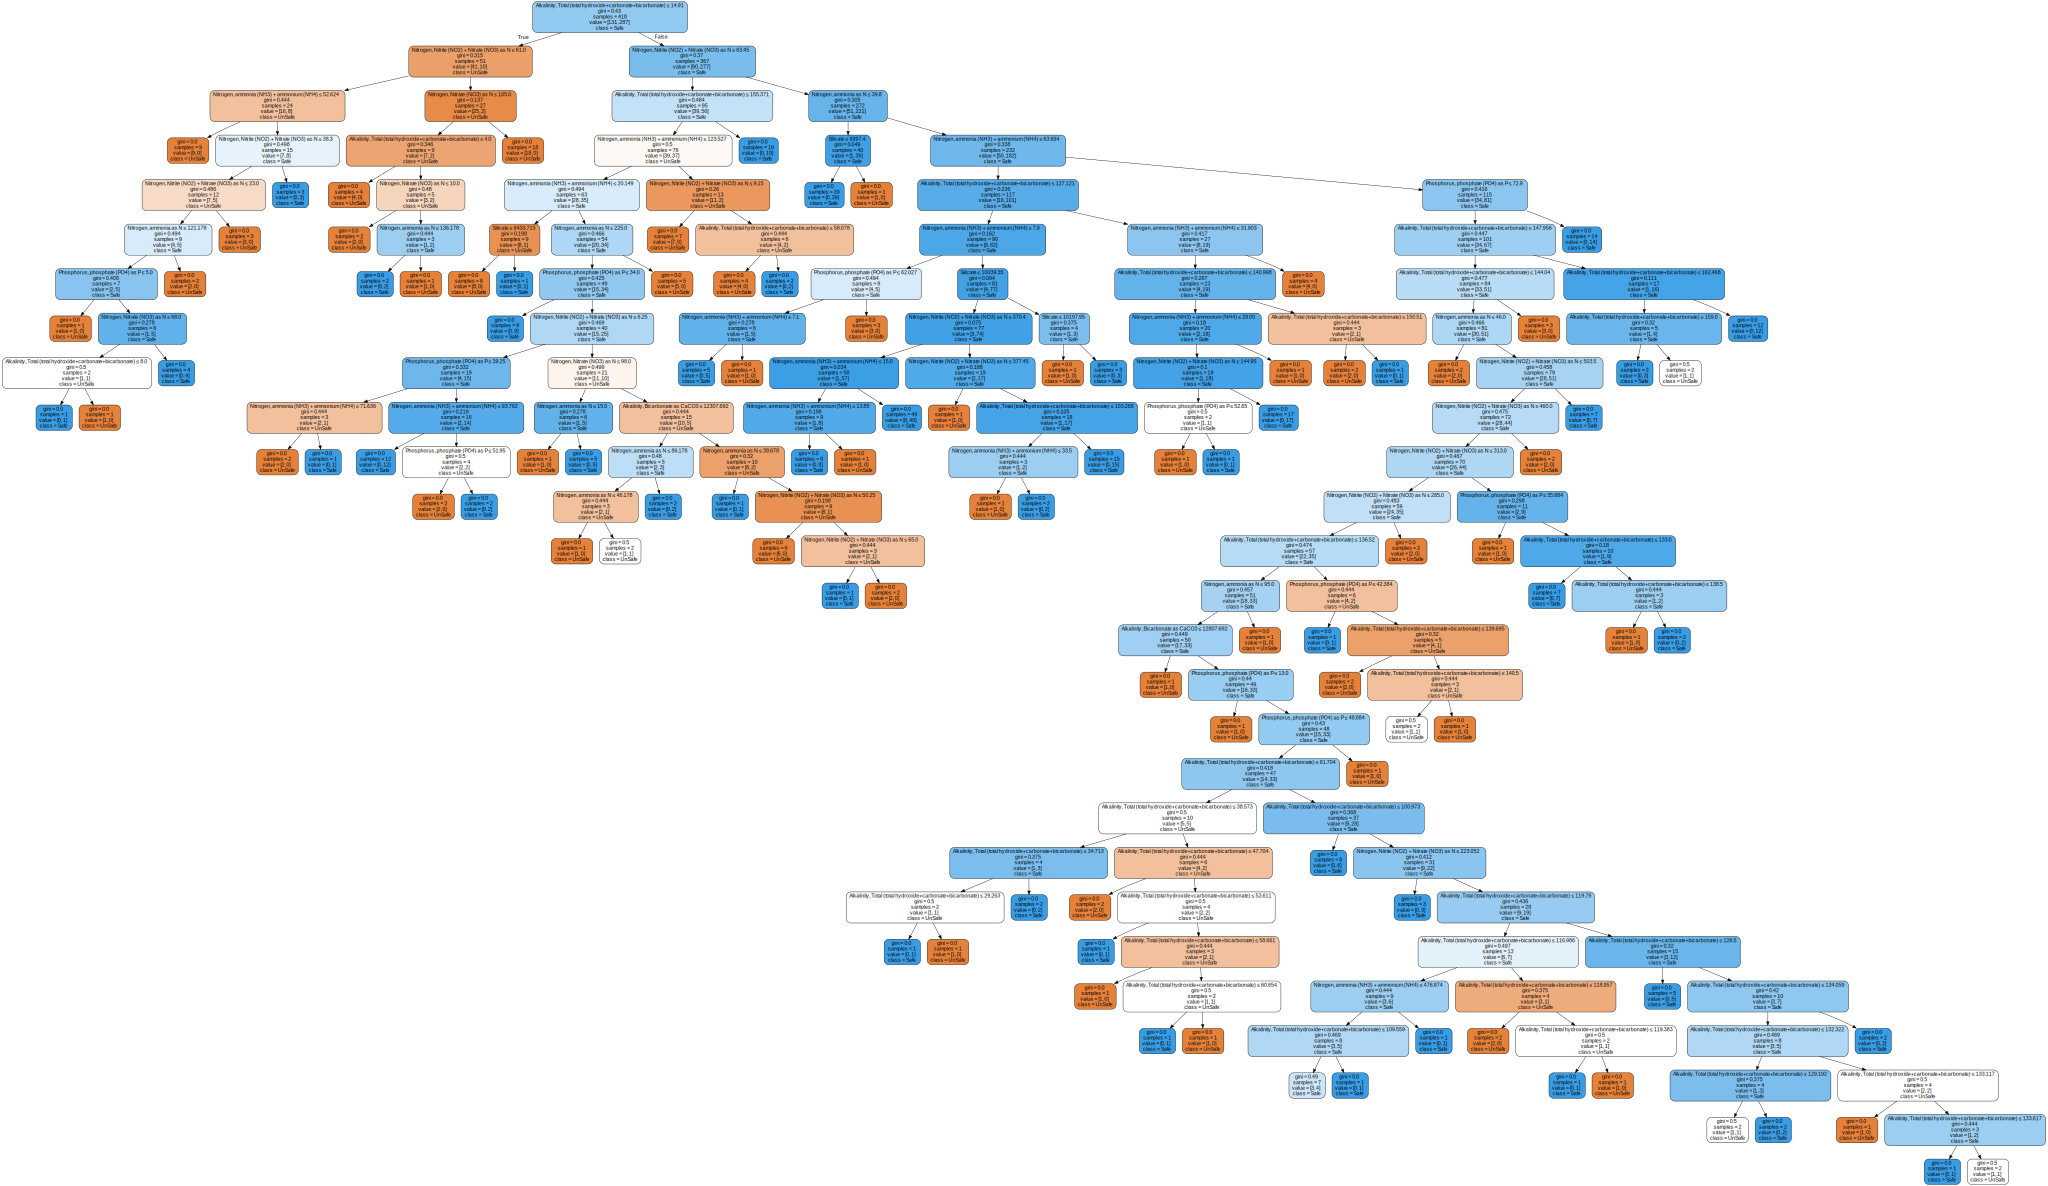

In [335]:
print("======== Experiment 04: Increase in Alkalinity - pH Increases ======== \n") # Ref Page 12-13 AnalysisofFeatures.pdf

X = train_df[['Silicate', 'Alkalinity, Total (total hydroxide+carbonate+bicarbonate)', 'Alkalinity, Carbonate as CaCO3', 'Alkalinity, Bicarbonate as CaCO3', 'Phosphorus, phosphate (PO4) as P', 'Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N','Nitrogen, Nitrate (NO3) as N','Nitrogen, ammonia as N', 'Nitrogen, ammonia (NH3) + ammonium (NH4)','Nitrogen, ammonia (NH3) + ammonium (NH4)']].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Silicate', 'Alkalinity, Total (total hydroxide+carbonate+bicarbonate)', 'Alkalinity, Carbonate as CaCO3', 'Alkalinity, Bicarbonate as CaCO3', 'Phosphorus, phosphate (PO4) as P', 'Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N','Nitrogen, Nitrate (NO3) as N','Nitrogen, ammonia as N', 'Nitrogen, ammonia (NH3) + ammonium (NH4)','Nitrogen, ammonia (NH3) + ammonium (NH4)'],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 05: Increase in CO3 levels - Alkalinity Levels - pH Increases ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.48      0.32      0.38        31
         1.0       0.75      0.85      0.80        74

    accuracy                           0.70       105
   macro avg       0.61      0.59      0.59       105
weighted avg       0.67      0.70      0.68       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.746 (0.048)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.29      0.34      0.32        29
         1.0       0.73      0.68      0.71        76

    accuracy                           0.59       105
   macro avg       0.51      0.51      0.51       105
weighted avg       0.61      0.59      0.60       105

_____Performing 10 Cross Fold Validation

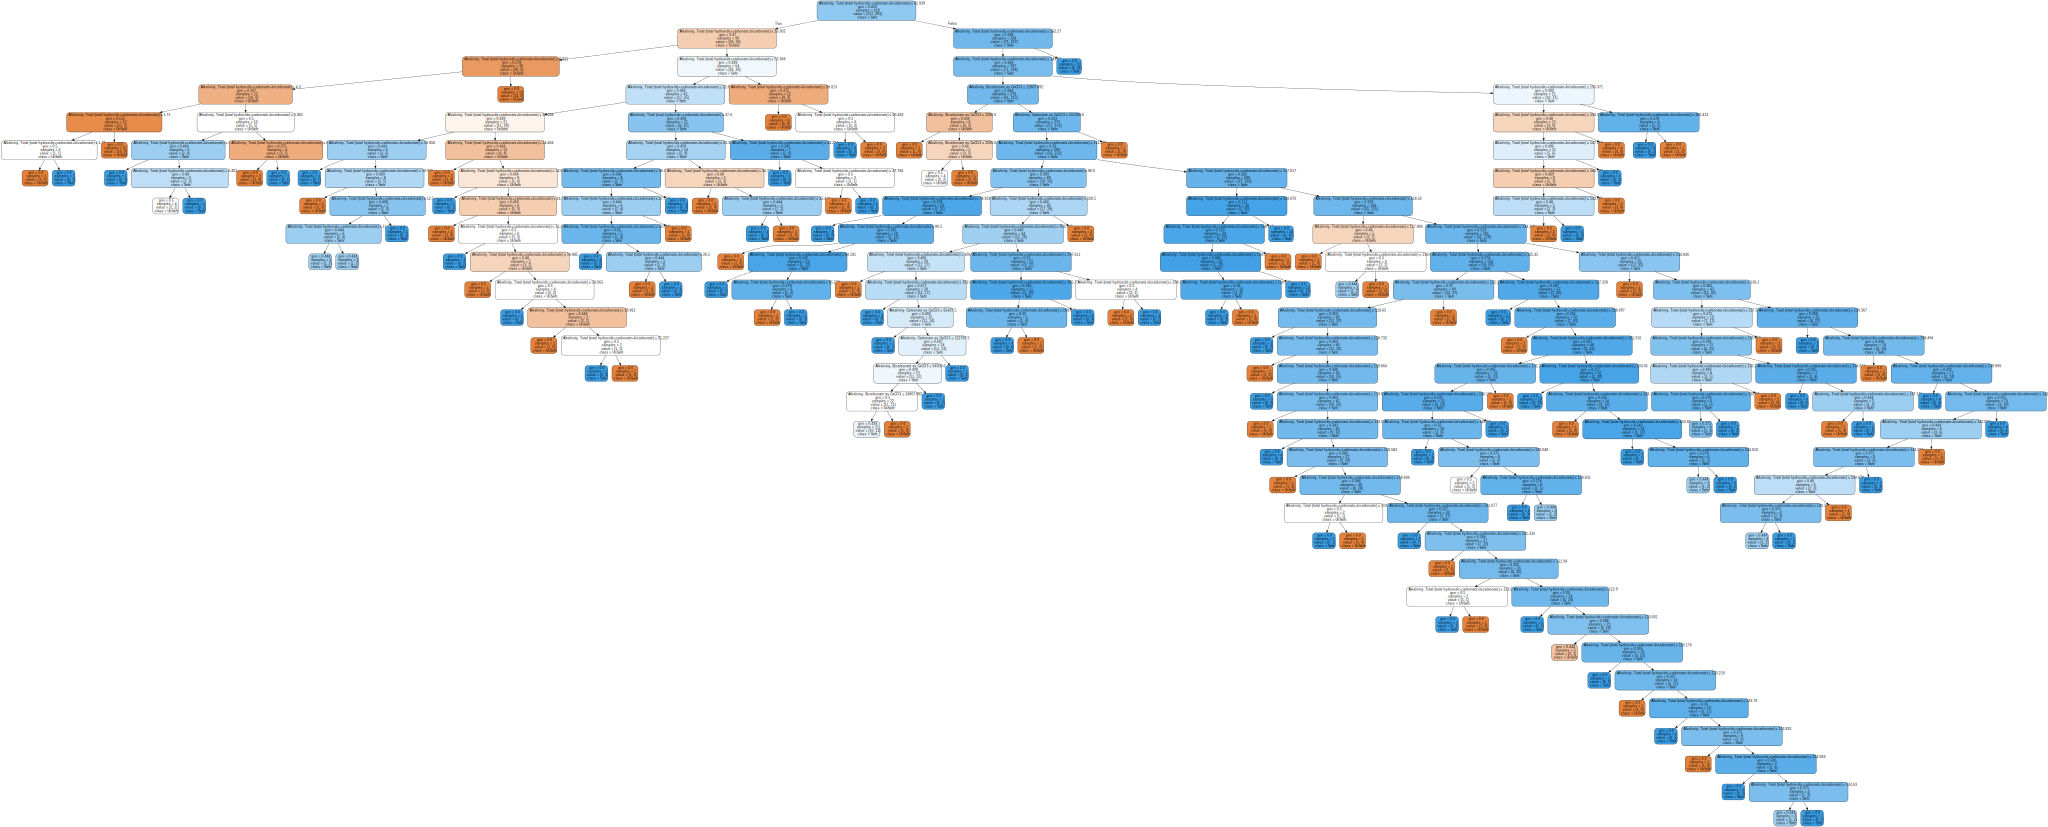

In [336]:
print("======== Experiment 05: Increase in CO3 levels - Alkalinity Levels - pH Increases ======== \n") # Ref Page 13-14 AnalysisofFeatures.pdf

X = train_df[['Alkalinity, Total (total hydroxide+carbonate+bicarbonate)', 'Alkalinity, Carbonate as CaCO3', 'Alkalinity, Bicarbonate as CaCO3']].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Alkalinity, Total (total hydroxide+carbonate+bicarbonate)', 'Alkalinity, Carbonate as CaCO3', 'Alkalinity, Bicarbonate as CaCO3'],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 06: High TDS level - low pH ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        30
         1.0       0.79      0.92      0.85        75

    accuracy                           0.77       105
   macro avg       0.73      0.66      0.68       105
weighted avg       0.76      0.77      0.75       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.748 (0.054)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.47      0.61      0.53        28
         1.0       0.84      0.75      0.79        77

    accuracy                           0.71       105
   macro avg       0.66      0.68      0.66       105
weighted avg       0.74      0.71      0.72       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.701 (0.067)
___

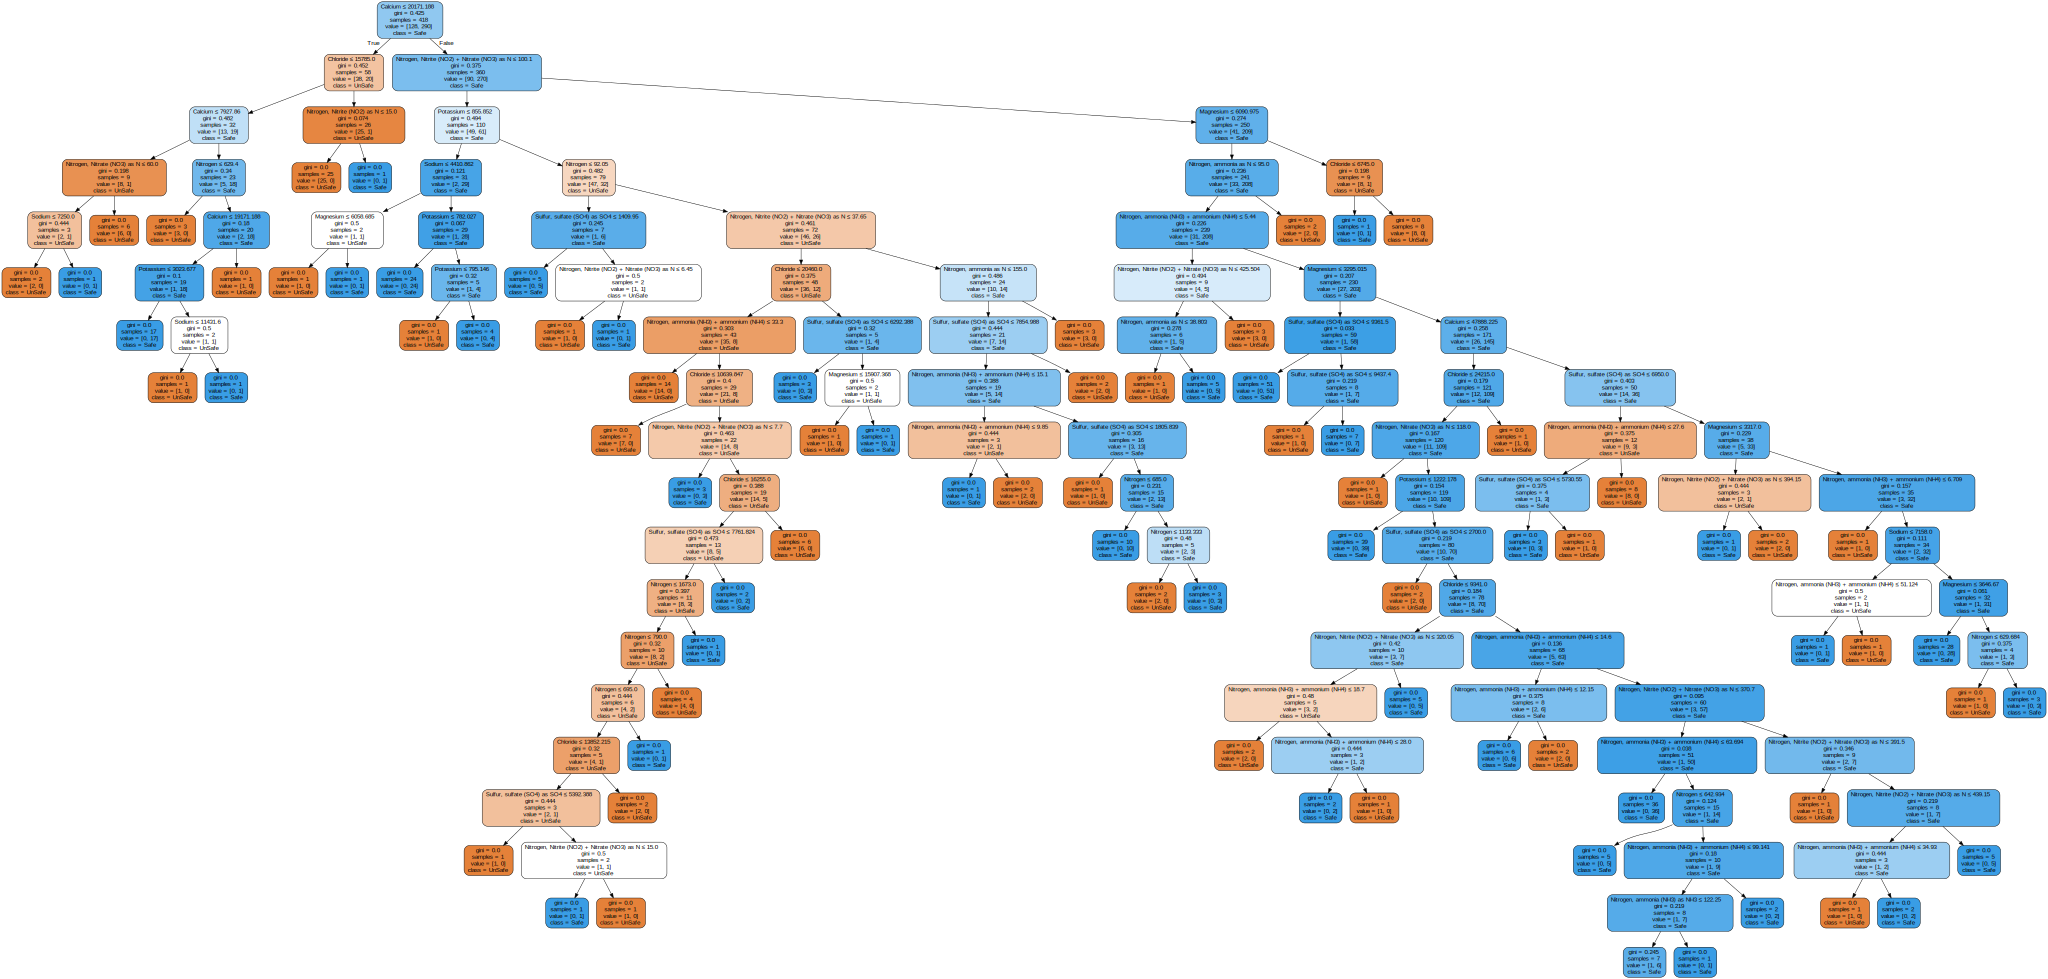

In [337]:
print("======== Experiment 06: High TDS level - low pH ======== \n") # Ref Page 14-15 AnalysisofFeatures.pdf

X = train_df[['Calcium', 'Magnesium','Potassium','Sodium','Nitrogen, ammonia (NH3) as NH3','Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N','Nitrogen, Nitrite (NO2) as N', 'Nitrogen, Nitrate (NO3) as N', 'Nitrogen, ammonia as N','Nitrogen','Nitrogen, ammonia (NH3) + ammonium (NH4)','Sulfur, sulfate (SO4) as SO4', 'Chloride']].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Calcium', 'Magnesium','Potassium','Sodium','Nitrogen, ammonia (NH3) as NH3','Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N','Nitrogen, Nitrite (NO2) as N', 'Nitrogen, Nitrate (NO3) as N', 'Nitrogen, ammonia as N','Nitrogen','Nitrogen, ammonia (NH3) + ammonium (NH4)','Sulfur, sulfate (SO4) as SO4', 'Chloride'],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 

======== Experiment 06: ======== 

_____Classification 01 - Logistic Regression_______
              precision    recall  f1-score   support

         0.0       0.75      0.10      0.18        30
         1.0       0.73      0.99      0.84        75

    accuracy                           0.73       105
   macro avg       0.74      0.54      0.51       105
weighted avg       0.74      0.73      0.65       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.703 (0.059)
_______Finished Logestic Regression______ 

_____Classification 02 - Decision Tree_______
              precision    recall  f1-score   support

         0.0       0.35      0.24      0.29        29
         1.0       0.74      0.83      0.78        76

    accuracy                           0.67       105
   macro avg       0.55      0.54      0.53       105
weighted avg       0.63      0.67      0.65       105

_____Performing 10 Cross Fold Validation______
Accuracy: 0.703 (0.061)
_______Finished Decision Tr

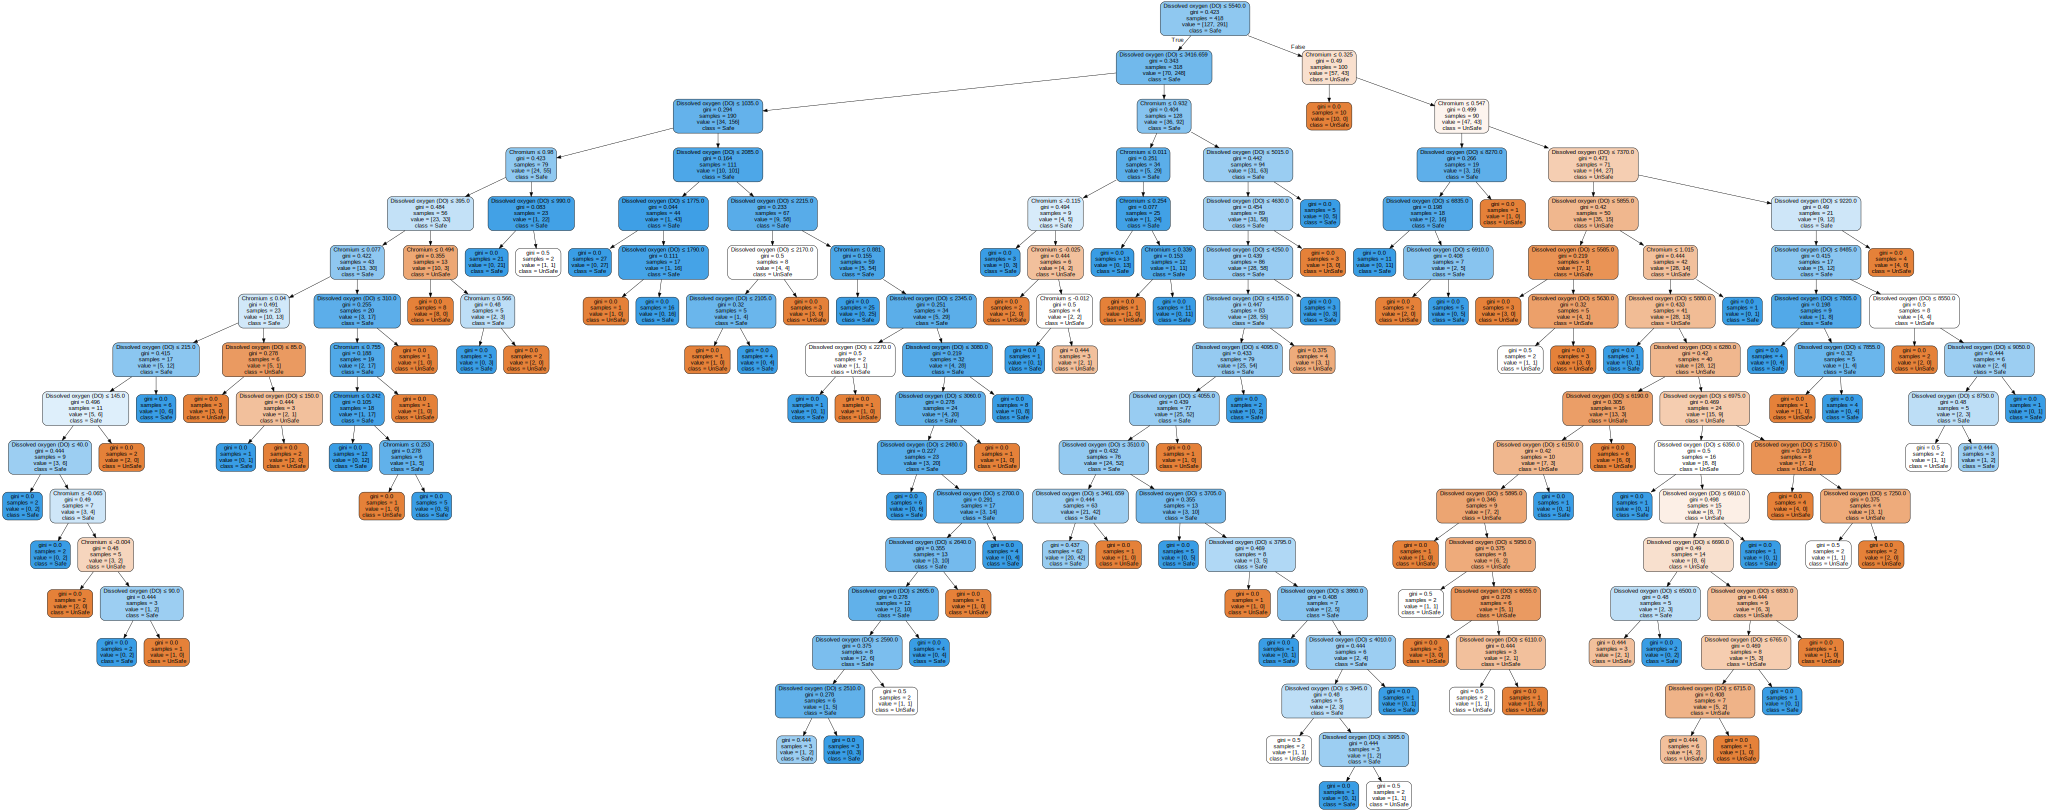

In [339]:
print("======== Experiment 06: ======== \n") # Ref[1], Page 1-2 AnalysisofFeatures.pdf

X = train_df[['Dissolved oxygen (DO)', 'Chromium',]].values # Creating array of all feature values
y = np.array(train_df['SAFE-pH'].values.tolist()) # Creating array of target value

logreg(X,y) # Calling Logistic Regression
clf = dt(X,y) # Calling Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Dissolved oxygen (DO)', 'Chromium',],  
                     class_names=['UnSafe','Safe'],  
                     filled=True, rounded=True,  
                     special_characters=True)   # Visualizing the Decision Tree
graph = graphviz.Source(dot_data)  
graph 
# [1] Ellis, Jason, Biplav Srivastava, Rachel Bellamy, and Andy Aaron. "Water advisor-a data-driven, multi-modal, contextual assistant to help with water usage decisions." In Proceedings of the AAAI Conference on Artificial Intelligence, vol. 32, no. 1. 2018.

### Part 03

Link to the Google Maps: https://www.google.com/maps/d/u/0/edit?mid=1is4pKZoIPb2gWdWQOU2k8WD_vB-ixYQK&usp=sharing

Range with SAFE-pH: 6.5-7.7 

Purple color Unsafe

Green color Safe